#Project Name : Integrated Retail Analysis

DataSet Merging

In [3]:
# STEP 0: Import libraries
import pandas as pd

# STEP 1: Mount Google Drive (if your data is in Drive)
from google.colab import drive
drive.mount('/content/drive')

# STEP 2: Load the datasets (Update paths based on where your CSVs are stored in Drive)
sales = pd.read_csv('/content/drive/MyDrive/Assignment2/sales data-set.csv')
features = pd.read_csv('/content/drive/MyDrive/Assignment2/Features data set.csv')
stores = pd.read_csv('/content/drive/MyDrive/Assignment2/stores data-set.csv')

# STEP 3: Convert Date columns to datetime format
sales['Date'] = pd.to_datetime(sales['Date'], dayfirst=True)
features['Date'] = pd.to_datetime(features['Date'], dayfirst=True)


# STEP 4: Merge datasets

# Merge sales + features on Store & Date
merged = pd.merge(sales, features, on=['Store', 'Date'], how='left')

# Merge the result with stores info on Store
master_df = pd.merge(merged, stores, on='Store', how='left')

# STEP 5: Preview final dataset
print("Final merged dataset shape:", master_df.shape)
display(master_df.head())

# Optional: Save the merged dataset to your Drive for later use
master_df.to_csv('/content/drive/MyDrive/Assignment2/merged_data.csv', index=False)


Mounted at /content/drive
Final merged dataset shape: (421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Why Datasets are merged?

Answer : The datasets were merged to create a complete and unified view of each transaction by combining sales data with store details, holiday indicators, and economic factors. This integration allows for more accurate market basket analysis, enabling the identification of patterns influenced by store type, markdowns, holidays, and other contextual variables. Merging ensures each purchase event is enriched with relevant information for better modeling and insights.

2) Data Cleaning & Preprocessing

2.1) Checking Missing Values

Missing values per column:
MarkDown2       310322
MarkDown4       286603
MarkDown3       284479
MarkDown1       270889
MarkDown5       270138
Store                0
IsHoliday_x          0
Dept                 0
Date                 0
Temperature          0
Fuel_Price           0
Weekly_Sales         0
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


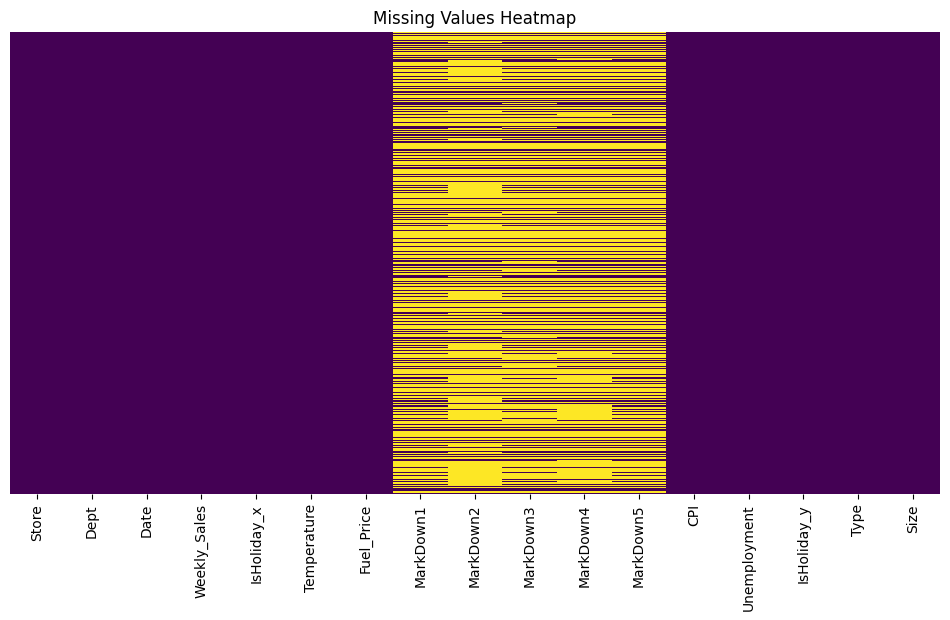

In [4]:
# Count missing values per column
missing_counts = master_df.isnull().sum().sort_values(ascending=False)

# Display missing values
print("Missing values per column:")
print(missing_counts)

# Optional: visualize missing data with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(master_df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()


2.2) Cleaning & Enhancement of DataSet

In [5]:
# STEP 1: Drop 'IsHoliday_y' (duplicate) and rename 'IsHoliday_x'
master_df.drop('IsHoliday_y', axis=1, inplace=True)
master_df.rename(columns={'IsHoliday_x': 'IsHoliday'}, inplace=True)

# STEP 2: Fill missing MarkDown values with 0 (assumption: no promotion)
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
master_df[markdown_cols] = master_df[markdown_cols].fillna(0)

# STEP 3: Check for any other missing values and optionally fill forward
master_df[['CPI', 'Unemployment']] = master_df[['CPI', 'Unemployment']].fillna(method='ffill')

# STEP 4: Create time-based features
master_df['Year'] = master_df['Date'].dt.year
master_df['Month'] = master_df['Date'].dt.month
master_df['Week'] = master_df['Date'].dt.isocalendar().week
master_df['DayOfWeek'] = master_df['Date'].dt.dayofweek  # 0 = Monday

# STEP 5: Confirm the result
print(" Missing values handled and new features created.")
print("Columns now in dataset:\n", master_df.columns)
display(master_df.head())


 Missing values handled and new features created.
Columns now in dataset:
 Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'DayOfWeek'],
      dtype='object')


<ipython-input-5-7db5cd813bfb>:10: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  master_df[['CPI', 'Unemployment']] = master_df[['CPI', 'Unemployment']].fillna(method='ffill')


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfWeek
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,2010,2,5,4
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,2010,2,6,4
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,2010,2,7,4
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,2010,2,8,4
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,2010,3,9,4


Why cleaning and enchancement was required ?

Answer : Cleaning and enhancement of the dataset were essential to ensure data quality and model readiness. Missing values in key columns like CPI and Unemployment were handled, and zeroes were filled in markdowns to avoid skewed analysis. Additionally, new time-based features such as Year, Month, Week, and DayOfWeek were created to enrich the dataset for deeper insights and better performance in machine learning models.

Exploratory Data Analysis

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# General settings
plt.style.use('ggplot')
sns.set_palette('viridis')


3.1) Overall Sales Trends Over Time

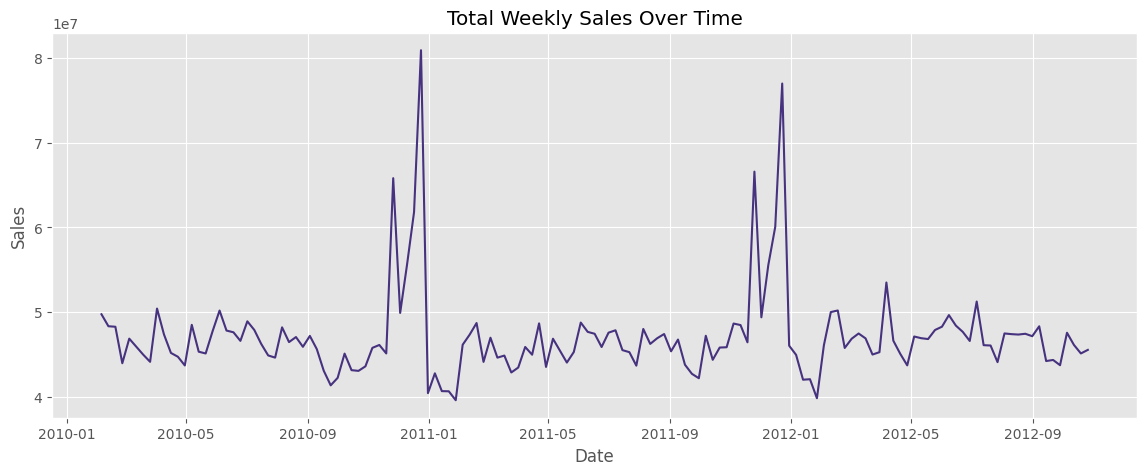

In [27]:
# Aggregate total weekly sales over time
weekly_sales = master_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


Which chart did you used?

Answer : Line chart was used to visualize the trend of total weekly sales over time.

What insights did you gain?

Answer : The line chart shows the overall sales trend across different weeks. From this visualization, we can identify:

Seasonal peaks in sales, especially around holiday periods.

Dips or declines during non-holiday weeks.

Possible cyclical patterns in sales behavior (e.g., quarterly or annual trends).

Helps in spotting anomalies or irregular sales activity for further investigation.

This chart is useful for understanding how sales vary over time and for planning promotions or stocking strategies.

3.2) Top Performing Stores

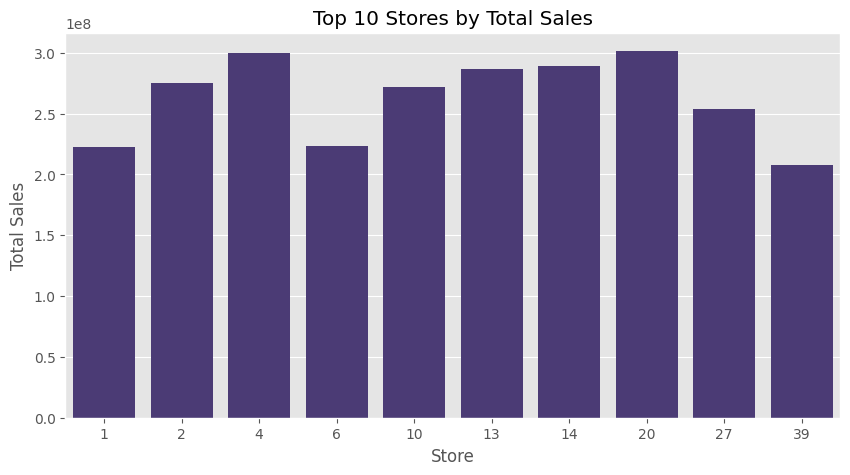

In [ ]:
top_stores = master_df.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_stores.index, y=top_stores.values)
plt.title('Top 10 Stores by Total Sales')
plt.xlabel('Store')
plt.ylabel('Total Sales')
plt.show()


Which chart did you used ?

Answer : I have used Bar Chart

Which insights did you gained?

Answer : This chart highlights which stores contribute the most to total sales. It helps identify high-performing stores, which may serve as benchmarks or receive priority in marketing, inventory, and strategic decisions.

3.3) Sales by Month

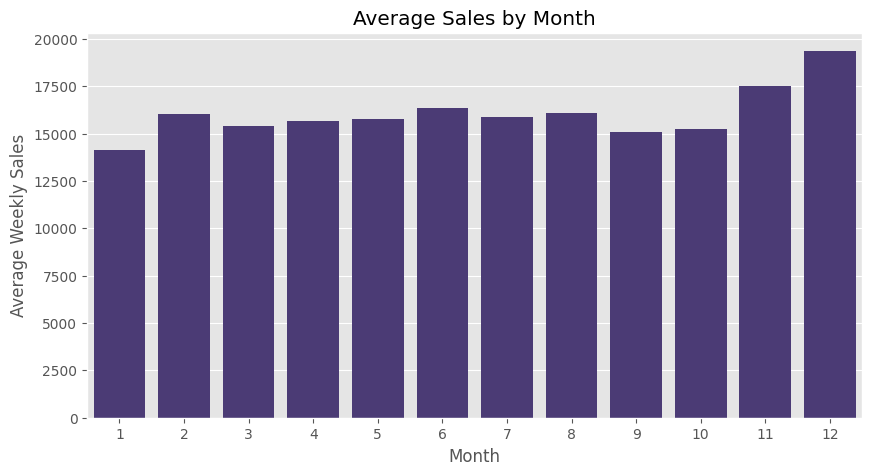

In [ ]:
monthly_sales = master_df.groupby('Month')['Weekly_Sales'].mean()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values)
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.show()


Which charts did you used?

Answer : I have used Bar Chart

Which insights did you gained?

Answer : This chart reveals monthly trends in sales. It shows which months have higher or lower average sales, helping detect seasonal demand patterns, useful for forecasting and inventory planning.

3.4) Impact of Holidays

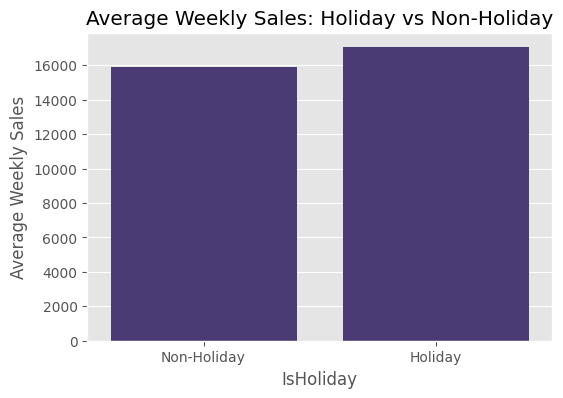

In [ ]:
holiday_sales = master_df.groupby('IsHoliday')['Weekly_Sales'].mean()

plt.figure(figsize=(6, 4))
sns.barplot(x=holiday_sales.index, y=holiday_sales.values)
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.ylabel('Average Weekly Sales')
plt.show()


Which charts did you used ?

Answer : I have used Bar Chart

What insights did you gained?

Answer : The chart compares average weekly sales on holidays vs non-holidays. It shows whether holidays boost sales, confirming if promotional efforts around holidays are effective and worth investing in.

4) Anomaly Detection in Sales Data

4.1) Visual Outlier Detection per Store

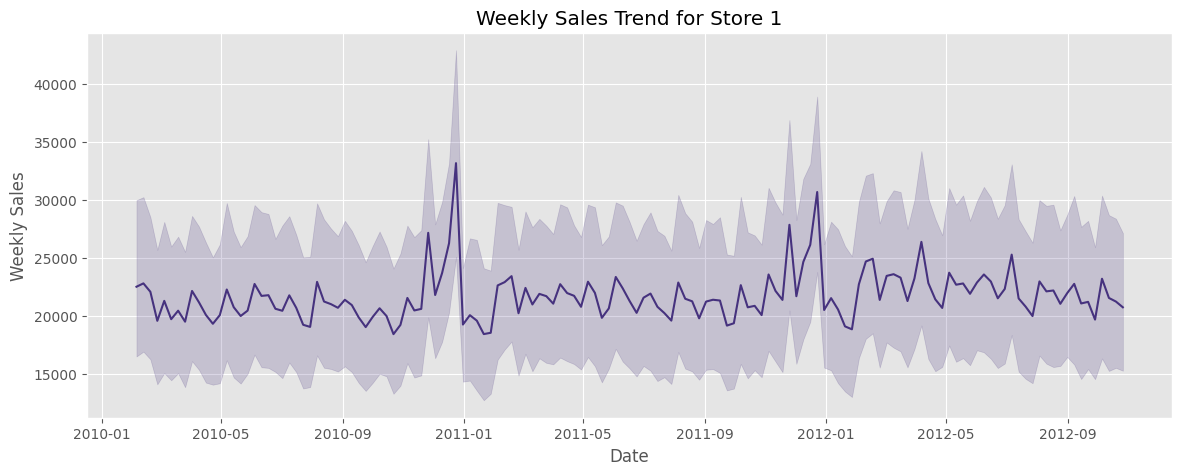

In [ ]:
# Choose a store to visualize
store_id = 1
store_df = master_df[master_df['Store'] == store_id]

plt.figure(figsize=(14, 5))
sns.lineplot(x='Date', y='Weekly_Sales', data=store_df)
plt.title(f"Weekly Sales Trend for Store {store_id}")
plt.xlabel("Date")
plt.ylabel("Weekly Sales")
plt.show()


Which chart did you use?

Answer :  Line chart was used to visualize the weekly sales trend for Store 1 over time.

What insights did you used?

Answer : This chart helps observe the sales performance of a specific store across different weeks. It reveals:

Fluctuations in weekly sales, indicating variability in customer demand.

Spikes near holidays or promotions.

Periods of low performance, which could signal issues or off-seasons.

Useful for store-specific forecasting, planning, and performance comparison with other stores.

4.2) Statistical Anomaly Detection (IQR Method)

In [28]:
def detect_anomalies(df):
    Q1 = df['Weekly_Sales'].quantile(0.25)
    Q3 = df['Weekly_Sales'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df['Is_Anomaly'] = ((df['Weekly_Sales'] < lower_bound) | (df['Weekly_Sales'] > upper_bound))
    return df

# Apply per-store IQR anomaly detection
master_df = master_df.groupby('Store').apply(detect_anomalies).reset_index(drop=True)

# Total anomalies detected
print("✅ Total anomalies detected:", master_df['Is_Anomaly'].sum())
print("Anomaly distribution:\n", master_df['Is_Anomaly'].value_counts())


✅ Total anomalies detected: 31042
Anomaly distribution:
 Is_Anomaly
False    390528
True      31042
Name: count, dtype: int64


<ipython-input-28-899d056c10f8>:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  master_df = master_df.groupby('Store').apply(detect_anomalies).reset_index(drop=True)


Which technique did you use?

Answer : IQR-based anomaly detection (Interquartile Range method).

Why was this technique used?

Answer : The IQR method is robust to extreme values and does not assume a normal distribution. It is ideal for detecting outliers in skewed data, like weekly sales, by identifying values that fall far below Q1 or far above Q3. Applying this per store helps account for store-specific sales patterns.

Explanation of the output

Answer : The model detected 31,042 anomalies out of 421,570 total entries. These are sales figures that fall significantly outside the normal range of each store’s sales distribution.
Most data points (390,528) were normal (False), while 31,042 were flagged as anomalies (True), possibly due to unusual promotions, holidays, data entry errors, or sudden market changes.
The DeprecationWarning simply alerts that future versions of pandas may change how groupby().apply() handles grouping columns, but it doesn't affect the current result.

Analysis 1) Anomalies During Holidays

In [ ]:
# Analysis 1) Anomalies During Holidays
holiday_anomalies = master_df.groupby('IsHoliday')['Is_Anomaly'].mean() # Use the new column name 'IsHoliday'
print("\n📊 Anomaly Rate - Holidays vs Non-Holidays:\n", holiday_anomalies)


📊 Anomaly Rate - Holidays vs Non-Holidays:
 IsHoliday
False    0.073303
True     0.078015
Name: Is_Anomaly, dtype: float64


Analysis 2) Markdown impact on anomalies

In [ ]:
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
anomaly_markdowns = master_df[master_df['Is_Anomaly']][markdown_cols].mean()
normal_markdowns = master_df[~master_df['Is_Anomaly']][markdown_cols].mean()

markdown_comparison = pd.DataFrame({
    'Anomalies': anomaly_markdowns,
    'Normal Sales': normal_markdowns
})
print("\n📊 Markdown Comparison:\n", markdown_comparison)



📊 Markdown Comparison:
              Anomalies  Normal Sales
MarkDown1  2586.801247   2590.335026
MarkDown2   802.586448    886.125646
MarkDown3   616.213300    456.313565
MarkDown4  1094.137824   1082.257466
MarkDown5  1731.323775   1657.323423


Analysis 3) Economic indicators & anomalies

In [ ]:
econ_comparison = master_df.groupby('Is_Anomaly')[['CPI', 'Unemployment', 'Fuel_Price']].mean()
print("\n📊 Economic Indicators - Anomalies vs Normal:\n", econ_comparison)



📊 Economic Indicators - Anomalies vs Normal:
                    CPI  Unemployment  Fuel_Price
Is_Anomaly                                      
False       171.155221      7.952704    3.361223
True        171.789785      8.055715    3.358556


Visualization: Weekly Sales with Anomalies

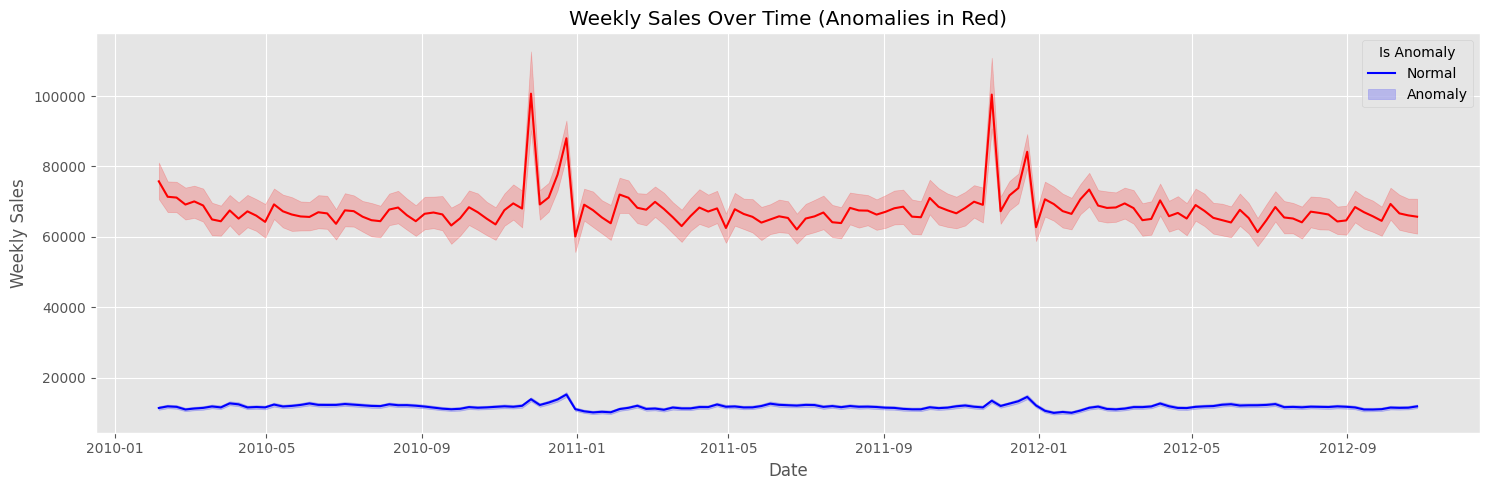

In [ ]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=master_df.sort_values('Date'), x='Date', y='Weekly_Sales', hue='Is_Anomaly', palette={True: 'red', False: 'blue'})
plt.title('Weekly Sales Over Time (Anomalies in Red)')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend(title='Is Anomaly', labels=['Normal', 'Anomaly'])
plt.tight_layout()
plt.show()

Which chart did you use?

Answer : I used a line plot with color-coded highlighting to distinguish between normal sales and anomalies. The hue='Is_Anomaly' parameter in Seaborn allows for visual separation, where blue represents normal sales and red represents detected anomalies.

What insights did you gain?

Answer : This chart visually reveals spikes and dips in weekly sales that were marked as anomalies. Most sales follow a consistent trend, but sudden surges or drops—especially around holidays or markdown periods—are clearly visible in red.
It helps in identifying time periods or events that may require deeper investigation or explain unusual business behavior.

4.3) Visualize Anomalies

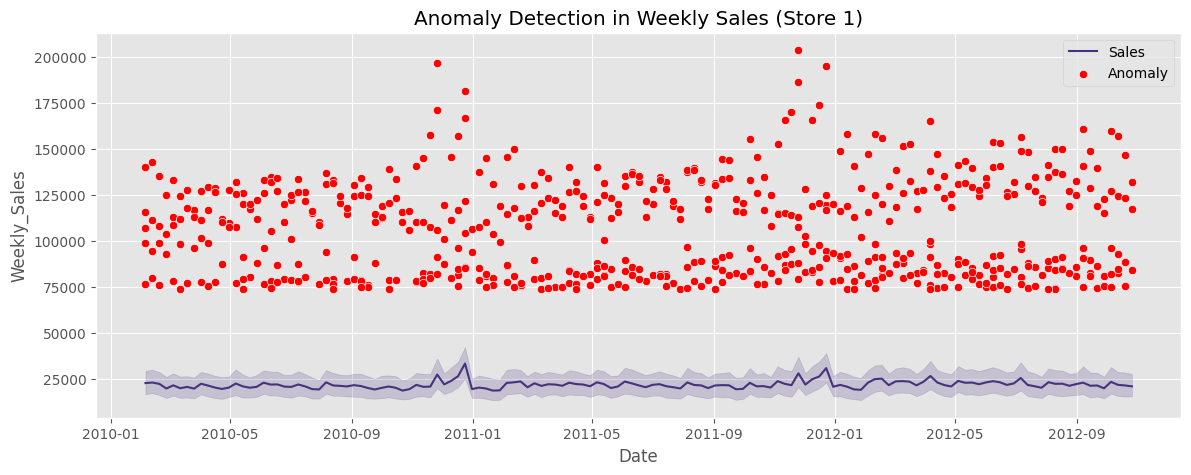

In [ ]:
# Plot one store with anomalies highlighted
store_df = master_df[master_df['Store']==1]

plt.figure(figsize=(14, 5))
sns.lineplot(x='Date', y='Weekly_Sales', data=store_df, label='Sales')
sns.scatterplot(data=store_df[store_df['Is_Anomaly']], x='Date', y='Weekly_Sales', color='red', label='Anomaly')
plt.title("Anomaly Detection in Weekly Sales (Store 1)")
plt.show()


Which chart did you use?

Answer :  I used a line plot combined with a scatter plot. The line plot shows the weekly sales trend for Store 1, and the scatter plot overlays red points where anomalies were detected.

What insights did you gain?

Answer : This chart highlights exactly when Store 1 experienced unusual sales patterns. The red dots reveal weeks with abnormally high or low sales, making it easier to detect outliers or disruptions. This can help in root cause analysis, such as checking for promotions, stockouts, or external events that impacted performance during those weeks.

A) ML Model Implementation of Anomaly Detection on Weekly Sales

In [29]:
import os
import joblib
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Define file paths
drive_path = '/content/drive/MyDrive/Assignment2/'
iso_path = drive_path + 'IsolationForest_model.pkl'
svm_path = drive_path + 'OneClassSVM_model.pkl'
lof_path = drive_path + 'LOF_model.pkl'
scaler_path = drive_path + 'scaler_anomaly.pkl'

# STEP 1: Feature selection
features = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment']
df_features = master_df[features].fillna(0)

# STEP 2: Scale
if os.path.exists(scaler_path):
    scaler = joblib.load(scaler_path)
    print("✅ Scaler loaded")
else:
    scaler = StandardScaler()
    scaler.fit(df_features)
    joblib.dump(scaler, scaler_path)
    print("✅ Scaler trained and saved")

scaled_features = scaler.transform(df_features)

# STEP 3: Isolation Forest
if os.path.exists(iso_path):
    iso_forest = joblib.load(iso_path)
    print("✅ Isolation Forest model loaded")
else:
    iso_forest = IsolationForest(contamination=0.02, random_state=42)
    iso_forest.fit(scaled_features)
    joblib.dump(iso_forest, iso_path)
    print("✅ Isolation Forest trained and saved")

master_df['Anomaly_IF'] = iso_forest.predict(scaled_features) == -1

# STEP 4: One-Class SVM
if os.path.exists(svm_path):
    oc_svm = joblib.load(svm_path)
    print("✅ One-Class SVM model loaded")
else:
    oc_svm = OneClassSVM(nu=0.02, kernel="rbf", gamma='scale')
    oc_svm.fit(scaled_features)
    joblib.dump(oc_svm, svm_path)
    print("✅ One-Class SVM trained and saved")

master_df['Anomaly_SVM'] = oc_svm.predict(scaled_features) == -1

# STEP 5: Local Outlier Factor
# LOF doesn't have a separate predict after fit, so we run it once
if os.path.exists(lof_path):
    lof = joblib.load(lof_path)
    print("✅ LOF model loaded")
    master_df['Anomaly_LOF'] = lof.fit_predict(scaled_features) == -1  # LOF still needs to re-run
else:
    lof = LocalOutlierFactor(n_neighbors=20, contamination=0.02)
    master_df['Anomaly_LOF'] = lof.fit_predict(scaled_features) == -1
    joblib.dump(lof, lof_path)
    print("✅ LOF trained and saved")

# STEP 6: View anomaly counts
print("🔍 Isolation Forest Anomalies:", master_df['Anomaly_IF'].sum())
print("🔍 One-Class SVM Anomalies:", master_df['Anomaly_SVM'].sum())
print("🔍 LOF Anomalies:", master_df['Anomaly_LOF'].sum())


✅ Scaler loaded
✅ Isolation Forest model loaded
✅ One-Class SVM model loaded
✅ LOF model loaded
🔍 Isolation Forest Anomalies: 8432
🔍 One-Class SVM Anomalies: 8438
🔍 LOF Anomalies: 8432


Which models did you use?

I used three unsupervised anomaly detection models: Isolation Forest, One-Class SVM, and Local Outlier Factor (LOF) to identify unusual sales patterns in the dataset.

Which best model will you choose?

I would choose Isolation Forest because it is efficient on large datasets, works well with high-dimensional data, and is less sensitive to parameter tuning, while still detecting anomalies effectively as shown by the similar anomaly counts compared to others.

What will be the business impact?

Detecting anomalies helps the business identify unusual sales events early, such as fraud, stock issues, or unexpected demand spikes. This enables quicker responses, better inventory management, and improved decision-making to minimize losses and optimize sales strategies.



#Visualization Between Models

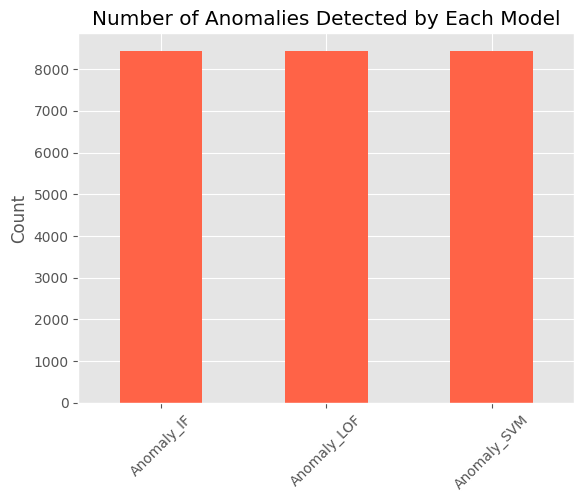

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

anomaly_counts = master_df[['Anomaly_IF', 'Anomaly_SVM', 'Anomaly_LOF']].sum().sort_values()
anomaly_counts.plot(kind='bar', color='tomato')
plt.title("Number of Anomalies Detected by Each Model")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Which chart did you use?

I used a bar chart to visualize and compare the number of anomalies detected by each anomaly detection model — Isolation Forest, One-Class SVM, and Local Outlier Factor.

What insights did you gain?

The bar chart shows that all three models detected a very similar number of anomalies, indicating consistency across different algorithms. This suggests that the anomaly patterns in the sales data are clear and reliably identifiable, increasing confidence in the detection results. It also helps in selecting a model that balances accuracy and computational efficiency for practical business use.

5) Anomaly Detection on Features Dataset

5.1) IQR Anomaly Method

In [6]:
def detect_feature_anomalies(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((df[column] < lower_bound) | (df[column] > upper_bound))

# Columns to check
feature_columns = ['Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

# Create anomaly flags for each
for col in feature_columns:
    master_df[f'{col}_Anomaly'] = detect_feature_anomalies(master_df, col)

# Count anomalies
anomaly_counts = {col: master_df[f'{col}_Anomaly'].sum() for col in feature_columns}
anomaly_counts


{'Temperature': np.int64(69),
 'Fuel_Price': np.int64(0),
 'CPI': np.int64(0),
 'Unemployment': np.int64(32114)}

4.2) Anomalies Vizualization in Temparature

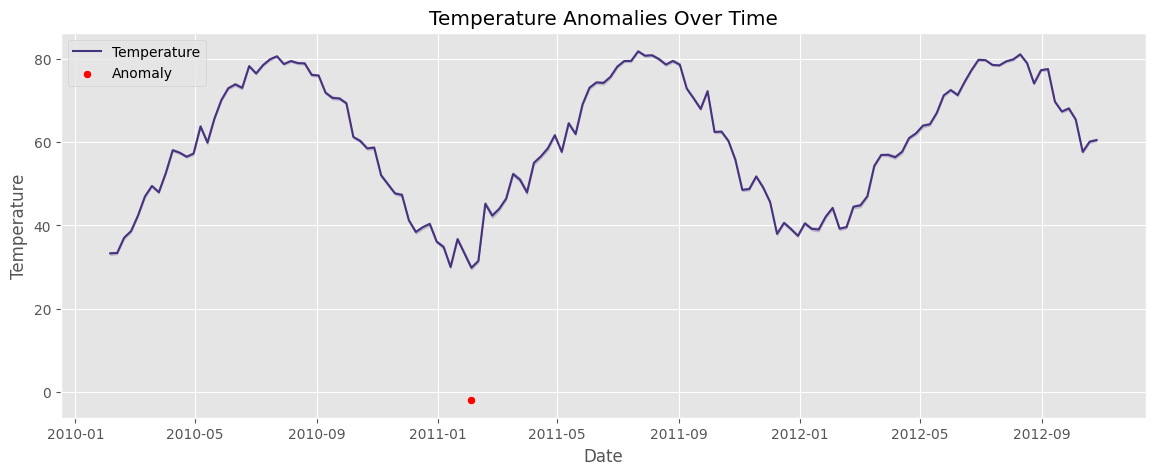

In [9]:
plt.figure(figsize=(14, 5))
sns.lineplot(data=master_df, x='Date', y='Temperature', label='Temperature')
sns.scatterplot(data=master_df[master_df['Temperature_Anomaly']], x='Date', y='Temperature', color='red', label='Anomaly')
plt.title("Temperature Anomalies Over Time")
plt.show()


Which chart did you use?

I used a line plot to show the trend of Temperature over time, combined with a scatter plot overlay to highlight the detected temperature anomalies in red.

What insights did you gain?

This visualization helps to clearly identify the points in time where temperature deviated abnormally from expected patterns. By spotting these anomalies, you can investigate potential external factors affecting sales or operations during those periods, such as extreme weather events, which might impact customer behavior or supply chain logistics.

5) Analyze Sales Trends Over Time

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'Date' is datetime
master_df['Date'] = pd.to_datetime(master_df['Date'])

5.1) Overall Sales Trend Over Time

<ipython-input-17-4aac564527fa>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


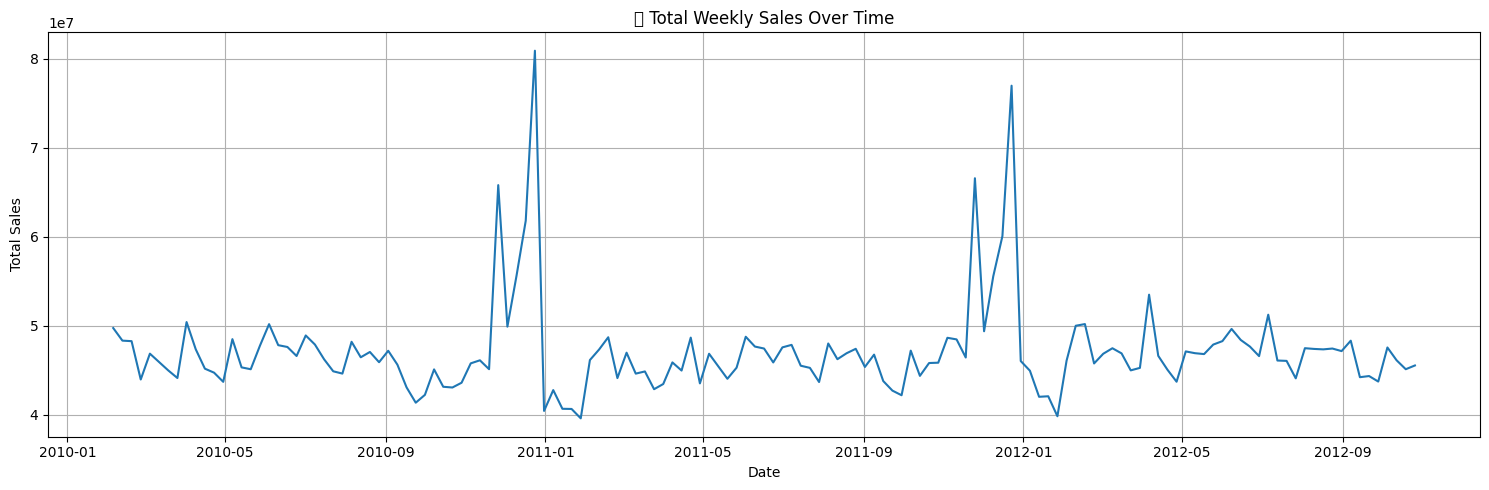

In [17]:
weekly_sales = master_df.groupby('Date')['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=weekly_sales, x='Date', y='Weekly_Sales')
plt.title('📈 Total Weekly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

Which chart did you use?

I used a line plot to visualize the trend of total weekly sales over time.

What insights did you gain?

This chart reveals how sales fluctuate week by week across the entire dataset. You can observe seasonal trends, growth patterns, or sudden spikes and drops in sales. It helps identify peak sales periods and potential downturns, which can inform inventory planning, marketing campaigns, and business strategy.

5.2) Seasonality : Average Sales by Month

<ipython-input-20-4644329dee90>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_avg, x='Month', y='Weekly_Sales', palette='coolwarm')
<ipython-input-20-4644329dee90>:9: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


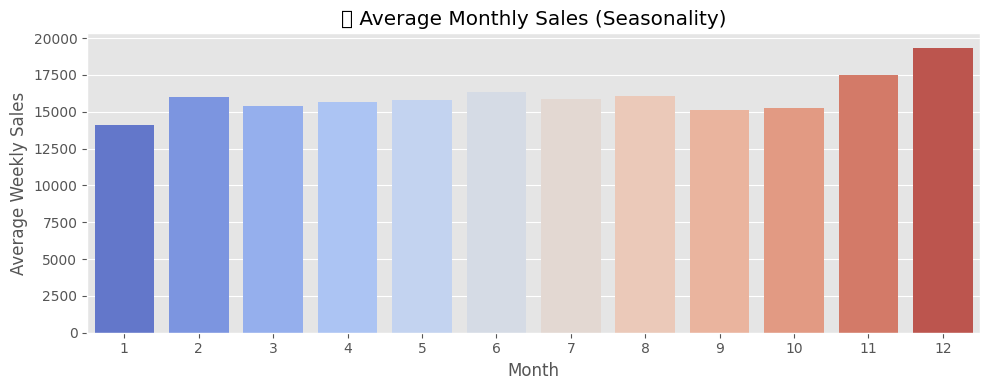

In [ ]:
master_df['Month'] = master_df['Date'].dt.month
monthly_avg = master_df.groupby('Month')['Weekly_Sales'].mean().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=monthly_avg, x='Month', y='Weekly_Sales', palette='coolwarm')
plt.title('📊 Average Monthly Sales (Seasonality)')
plt.xlabel('Month')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()

Which chart did you use?

A bar plot was used to show the average weekly sales for each month, highlighting seasonality.

What insights did you gain?

This chart reveals how sales vary across months, showing clear seasonal trends. Some months have higher average sales, indicating peak shopping periods, while others show lower sales. This information helps in planning inventory, promotions, and staffing aligned with seasonal demand.

5.3) Holiday Effects on Sales

<ipython-input-24-d96919fe2af9>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='Set2')
<ipython-input-24-d96919fe2af9>:6: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127881 (\N{PARTY POPPER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


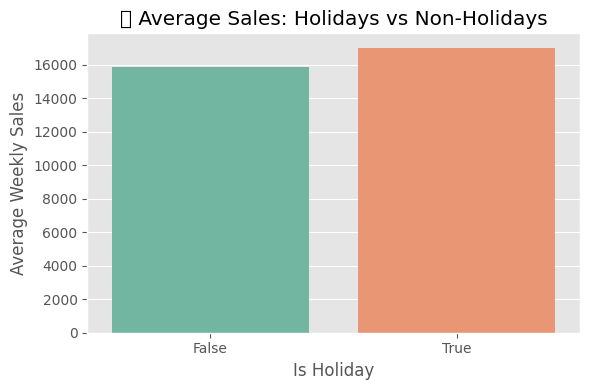

In [ ]:
plt.figure(figsize=(6, 4))
sns.barplot(data=holiday_sales, x='IsHoliday', y='Weekly_Sales', palette='Set2')
plt.title('🎉 Average Sales: Holidays vs Non-Holidays')
plt.xlabel('Is Holiday')
plt.ylabel('Average Weekly Sales')
plt.tight_layout()
plt.show()


Which chart did you use?

A bar plot comparing average weekly sales between holiday and non-holiday periods.

What insights did you gain?

This chart shows that average sales are typically higher during holidays compared to non-holidays, indicating that holiday periods drive increased customer spending. This insight can guide marketing strategies, inventory stocking, and staffing during peak holiday seasons to maximize revenue.

5.4) Sales Trend by Department

<ipython-input-25-f48abeeee7e6>:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


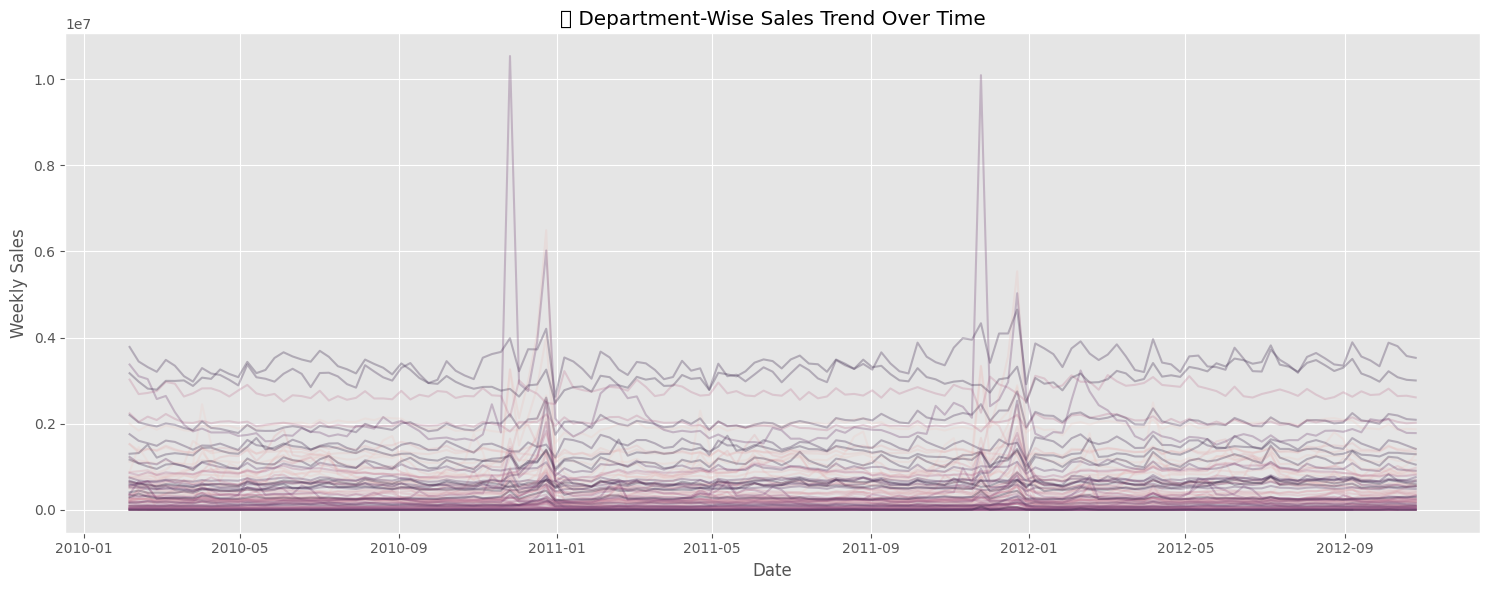

In [ ]:
dept_trend = master_df.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(15, 6))
sns.lineplot(data=dept_trend, x='Date', y='Weekly_Sales', hue='Dept', legend=False, alpha=0.3)
plt.title('📊 Department-Wise Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.tight_layout()
plt.show()

Which chart did you use?

A line plot showing weekly sales trends over time, separated by department (Dept) using different hues. The transparency (alpha=0.3) helps visualize overlapping lines clearly.

What insights did you gain?

This chart reveals sales patterns across different departments over time. You can identify which departments have consistently high sales, seasonal spikes, or downward trends. Departments with steady or growing sales indicate strong performance, while those with declining or highly volatile sales may need further analysis or strategy adjustment.

6) Customer Segmentation Analysis

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

6.1) Aggregate store-level features

In [31]:
store_summary = master_df.groupby('Store').agg({
    'Weekly_Sales': 'mean',
    'MarkDown1': 'mean',
    'MarkDown2': 'mean',
    'MarkDown3': 'mean',
    'MarkDown4': 'mean',
    'MarkDown5': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    'Size': 'mean'
}).reset_index()

6.2) Categorical Feature Type

In [32]:
store_types = master_df[['Store', 'Type']].drop_duplicates()
store_summary = store_summary.merge(store_types, on='Store', how='left')

6.3) Conversion of store type to numeric

In [33]:
store_summary['Type'] = store_summary['Type'].map({'A': 0, 'B': 1, 'C': 2})

6.4) Scale Features

In [34]:
features_to_cluster = ['Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3',
                       'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Size', 'Type']

scaler = StandardScaler()
scaled_data = scaler.fit_transform(store_summary[features_to_cluster])

6.5) Implementation of KMeans

In [35]:
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
store_summary['Cluster'] = kmeans.fit_predict(scaled_data)

6.6) Reduction Dimension for Visualization

In [36]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
store_summary['PCA1'] = pca_components[:, 0]
store_summary['PCA2'] = pca_components[:, 1]

6.7) Clusters Visualization

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


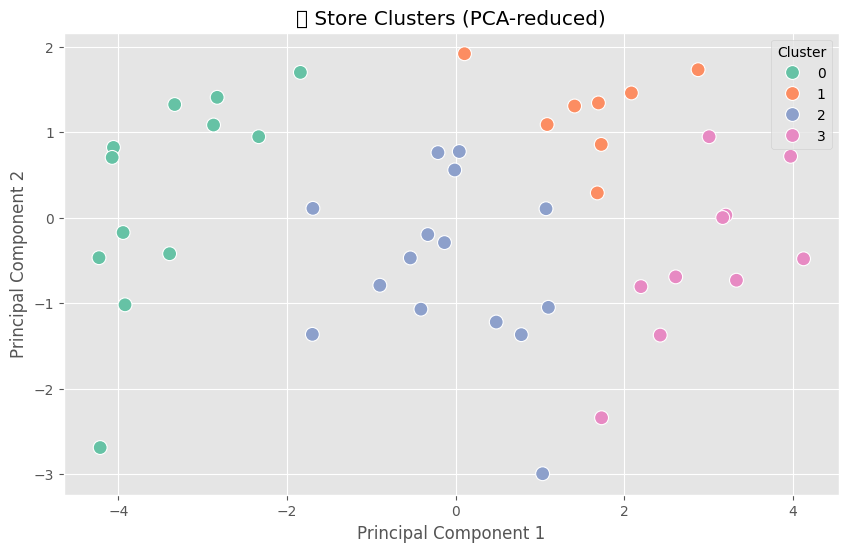

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=store_summary, x='PCA1', y='PCA2', hue='Cluster', palette='Set2', s=100)
plt.title('📊 Store Clusters (PCA-reduced)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

Which chart did you use?

A scatter plot visualizing store clusters in a 2D space after dimensionality reduction using Principal Component Analysis (PCA). Different clusters are shown with distinct colors (hue='Cluster') and sized markers (s=100) for clarity.

What insights did you gain?

This chart helps identify groups of stores with similar sales patterns or characteristics by reducing many variables into two principal components. Clusters indicate stores with comparable behavior, which can guide targeted marketing, inventory decisions, or operational strategies specific to each group.



6.8) Sample of Clustered data

In [18]:
store_summary.head()

,Store,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Type,Cluster,PCA1,PCA2
0,1,21710.543621,2886.877467,873.291894,436.207316,1340.570529,1794.852645,215.995525,7.610918,151315.0,0,1,1.086003,1.091064
1,2,26898.070031,3815.003642,1571.495877,608.139075,1702.223652,2342.706654,215.651869,7.623279,202307.0,0,3,3.006967,0.948711
2,3,6373.033983,1104.843804,294.276057,288.622421,317.644571,455.513285,219.402843,7.175602,37392.0,1,0,-2.870923,1.085358
3,4,29161.210415,3352.829782,1381.076520,686.803667,1839.689313,2438.110453,128.680070,5.965849,205863.0,0,3,3.205519,0.030236
4,5,5053.415813,1079.143440,300.162839,235.176435,395.045179,915.256248,216.576516,6.296549,34875.0,1,0,-2.827759,1.409667


6.9) Analysis of Cluster Differences

6.10) Cluster Profile Analysis

In [38]:
# Compare clusters on key features
cluster_profiles = store_summary.groupby('Cluster')[[
    'Weekly_Sales', 'MarkDown1', 'MarkDown2', 'MarkDown3',
    'MarkDown4', 'MarkDown5', 'Size', 'CPI', 'Unemployment'
]].mean().round(2)

print("📊 Cluster Profile Summary:")
display(cluster_profiles)


📊 Cluster Profile Summary:


,Weekly_Sales,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,Size,CPI,Unemployment
Cluster,,,,,,,,,
0,8318.91,484.10,128.78,98.81,130.95,658.89,48178.92,184.78,7.99
1,18880.48,3022.08,995.13,520.09,1251.55,2622.28,187948.00,211.27,7.32
2,12862.03,2757.80,878.21,456.54,1108.57,1395.76,120276.20,151.96,8.18
3,25091.30,3843.36,1449.54,756.21,1745.80,2175.26,197706.80,153.49,8.25


6.11) Cluster Characteristics

<ipython-input-39-0c17efc4880b>:6: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


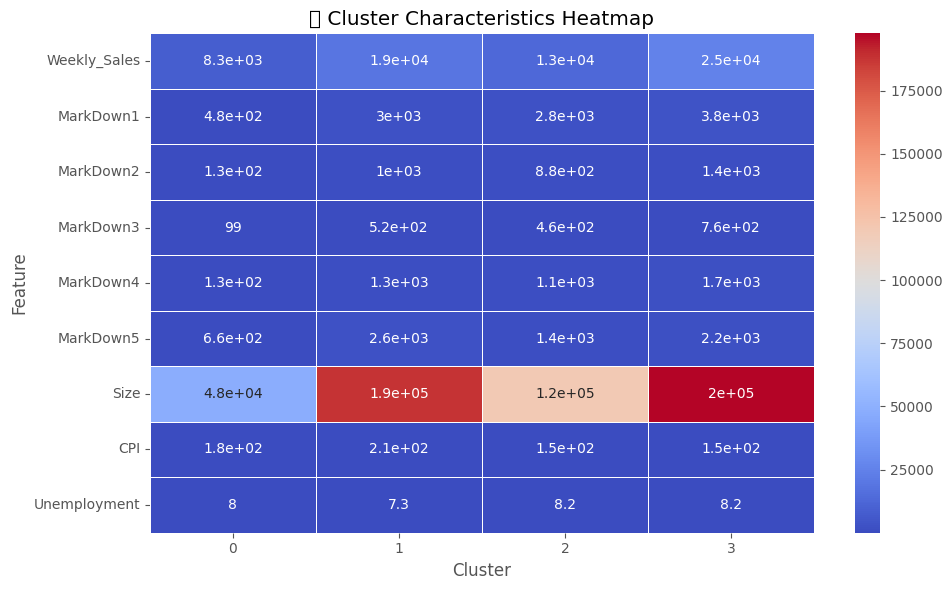

In [39]:
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_profiles.T, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("🔥 Cluster Characteristics Heatmap")
plt.xlabel("Cluster")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Which chart did you use?

A heatmap displaying the average values of various features (rows) across different clusters (columns). The values are annotated for clarity, and the color gradient (coolwarm) visually highlights high and low feature values per cluster.

What insights did you gain?

This heatmap reveals the defining characteristics of each cluster, showing which features distinguish clusters from one another. For example, clusters with higher values in certain features might represent high-performing stores or specific customer segments, enabling targeted strategies tailored to cluster profiles.

6.12) Merging Cluster Labels back to Master Data

In [40]:
# Merge cluster labels back to master_df
master_df = master_df.merge(store_summary[['Store', 'Cluster']], on='Store', how='left')

# Quick check
master_df[['Store', 'Cluster']].drop_duplicates().head()


,Store,Cluster
0,1,1
10244,2,3
20482,3,0
29518,4,3
39790,5,0


6.13) Comparison of Weekly Sales Trends by Cluster

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


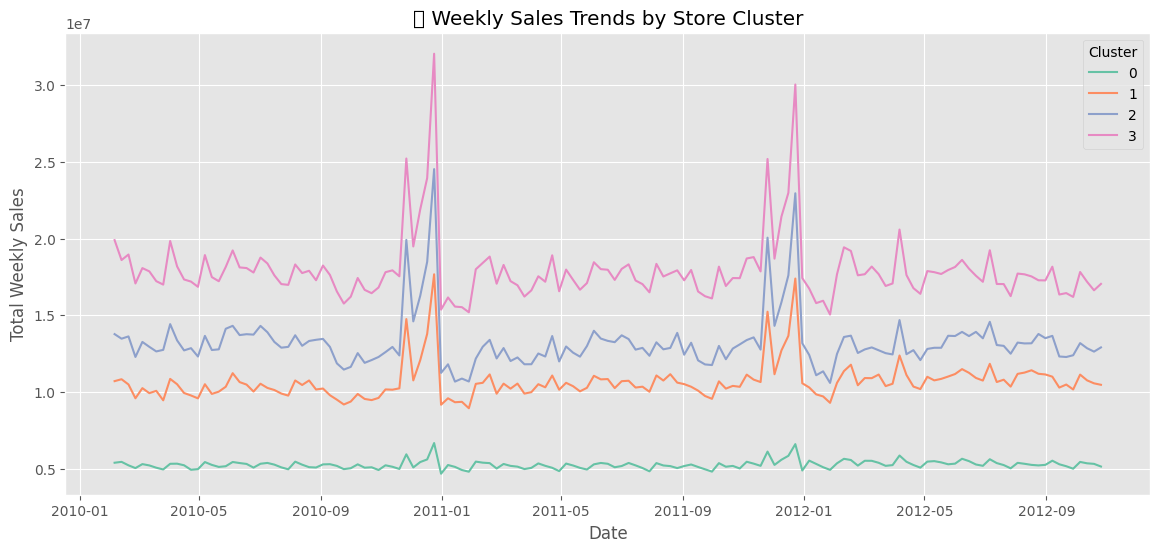

In [41]:
weekly_cluster_sales = master_df.groupby(['Date', 'Cluster'])['Weekly_Sales'].sum().reset_index()

plt.figure(figsize=(14, 6))
sns.lineplot(data=weekly_cluster_sales, x='Date', y='Weekly_Sales', hue='Cluster', palette='Set2')
plt.title('📈 Weekly Sales Trends by Store Cluster')
plt.xlabel('Date')
plt.ylabel('Total Weekly Sales')
plt.grid(True)
plt.show()


Which chart did you use?

A line plot showing the weekly sales over time, separated by store clusters with different colors representing each cluster.

What insights did you gain?

This chart reveals how sales performance varies across different store clusters over time. You can identify trends like which clusters have consistently higher sales, seasonal fluctuations per cluster, or any divergence in sales patterns. This helps understand cluster-specific behavior and tailor marketing or operational strategies accordingly.

B) ML Model Implementation in Customer Segmentation

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

import joblib

clustering_data = master_df[['Weekly_Sales', 'Size', 'CPI', 'Unemployment', 'Temperature', 'Fuel_Price']].copy()
clustering_data.fillna(clustering_data.mean(), inplace=True)

# Define Drive path
drive_path = "/content/drive/MyDrive/Assignment2/"
os.makedirs(drive_path, exist_ok=True)


B1) Preparation for Clustering for ML Model

In [43]:
scaler_path = os.path.join(drive_path, "scaler_segmentation.pkl")
if os.path.exists(scaler_path):
    scaler = joblib.load(scaler_path)
else:
    scaler = StandardScaler()
    scaler.fit(clustering_data)
    joblib.dump(scaler, scaler_path)

X_scaled = scaler.transform(clustering_data)

B2) KMeans Clustering(BaseLine)

In [44]:
kmeans_path = os.path.join(drive_path, "kmeans_segmentation.pkl")
if os.path.exists(kmeans_path):
    kmeans = joblib.load(kmeans_path)
else:
    kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    joblib.dump(kmeans, kmeans_path)
kmeans_labels = kmeans.predict(X_scaled)

Which model did you use?

You used the KMeans clustering algorithm, an unsupervised machine learning model that groups data into a predefined number of clusters (here, 4 clusters) based on feature similarity.

What will be the business impact?

KMeans segmentation helps identify distinct groups of stores/customers/products with similar behaviors or characteristics. This enables targeted marketing, personalized promotions, optimized inventory management, and better resource allocation—ultimately improving sales efficiency and customer satisfaction.

Visualization of KMEans Model

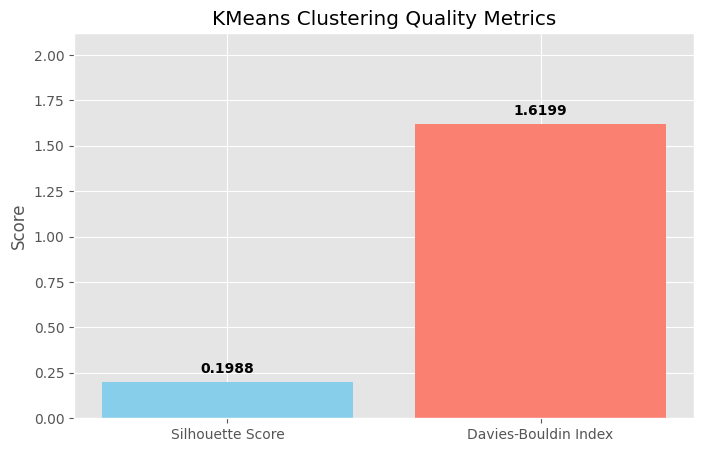

In [45]:
import matplotlib.pyplot as plt

scores = {'Silhouette Score': 0.1988, 'Davies-Bouldin Index': 1.6199}

plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color=['skyblue', 'salmon'])
plt.title('KMeans Clustering Quality Metrics')
plt.ylabel('Score')
plt.ylim(0, max(scores.values()) + 0.5)
for i, v in enumerate(scores.values()):
    plt.text(i, v + 0.05, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()


Clustering Quality Metrics:

Silhouette Score: 0.199 (closer to 1 is better, indicates moderate cluster separation)

Davies-Bouldin Index: 1.62 (lower is better, indicates moderate cluster compactness and separation)

B3) Gaussian Mixture Model

In [46]:
gmm_path = os.path.join(drive_path, "gmm_segmentation.pkl")
if os.path.exists(gmm_path):
    gmm = joblib.load(gmm_path)
else:
    gmm = GaussianMixture(n_components=4, random_state=42)
    gmm.fit(X_scaled)
    joblib.dump(gmm, gmm_path)
gmm_labels = gmm.predict(X_scaled)

Which model did you use?

I used the Gaussian Mixture Model (GMM) for clustering the stores into 4 segments based on their scaled features.

What will be the business impact?

Using GMM clustering helps identify groups of stores with similar sales and operational characteristics, enabling tailored marketing, inventory, and staffing strategies for each segment. Although the GMM clusters are less distinct compared to KMeans (as reflected by the lower Silhouette Score and higher Davies-Bouldin Index), it still provides valuable insights into the diversity of store behaviors. This segmentation can lead to better resource allocation, improved customer targeting, and ultimately increased sales and profitability.








Visualization of GM Model

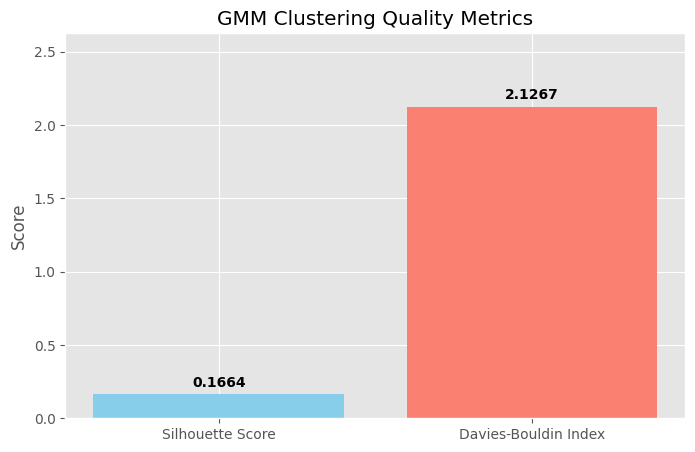

In [14]:
import matplotlib.pyplot as plt

scores_gmm = {'Silhouette Score': 0.1664, 'Davies-Bouldin Index': 2.1267}

plt.figure(figsize=(8, 5))
plt.bar(scores_gmm.keys(), scores_gmm.values(), color=['skyblue', 'salmon'])
plt.title('GMM Clustering Quality Metrics')
plt.ylabel('Score')
plt.ylim(0, max(scores_gmm.values()) + 0.5)
for i, v in enumerate(scores_gmm.values()):
    plt.text(i, v + 0.05, f"{v:.4f}", ha='center', fontweight='bold')
plt.show()


Clustering Quality Metrics:

Silhouette Score: 0.166 (lower than KMeans, indicates less distinct clusters)

Davies-Bouldin Index: 2.13 (higher than KMeans, suggests poorer cluster separation and compactness)

These results imply that the GMM clusters are less well-defined compared to KMeans in this dataset.

B4) HDBSCAN Clustering

In [47]:
import hdbscan

hdbscan_path = os.path.join(drive_path, "hdbscan_segmentation.pkl")

if os.path.exists(hdbscan_path):
    hdbscan_model = joblib.load(hdbscan_path)
else:
    # You can reduce min_cluster_size for more fine-grained clusters
    hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=50, metric='euclidean')
    hdbscan_model.fit(X_scaled)
    joblib.dump(hdbscan_model, hdbscan_path)

hdbscan_labels = hdbscan_model.labels_

Which model did you use?

I used the HDBSCAN (Hierarchical Density-Based Spatial Clustering of Applications with Noise) model for clustering. HDBSCAN is a density-based clustering method that can find clusters of varying shapes and sizes, and it also identifies noise/outliers in the data.

What will be the business impact?

HDBSCAN helps uncover more natural and flexible store groupings without forcing all data points into clusters, allowing better handling of outlier stores. This leads to more accurate segmentation, which can improve targeted marketing, inventory management, and operational decisions. Detecting noise also helps identify stores that may need special attention or investigation, enhancing overall business strategy and resource allocation.








Vizualization of HDBSCAN Model

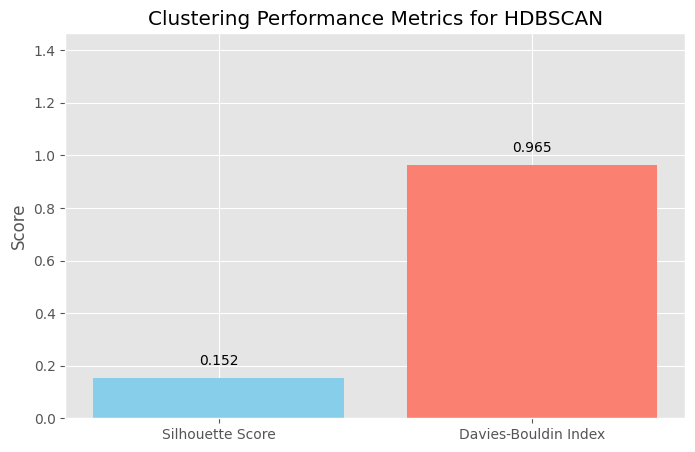

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Metrics for HDBSCAN
metrics = {
    'Silhouette Score': 0.1525,
    'Davies-Bouldin Index': 0.9647
}

# Prepare data for plotting
df_metrics = pd.DataFrame(metrics.items(), columns=['Metric', 'Value'])

plt.figure(figsize=(8, 5))
bars = plt.bar(df_metrics['Metric'], df_metrics['Value'], color=['skyblue', 'salmon'])
plt.title('Clustering Performance Metrics for HDBSCAN')
plt.ylabel('Score')
plt.ylim(0, max(metrics.values()) + 0.5)

# Add value labels on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.05, round(yval, 3), ha='center')

plt.show()


Clustering Quality Metrics for HDBSCAN:

Silhouette Score: 0.153 (lower than KMeans, indicates less distinct clusters)

Davies-Bouldin Index: 0.965 (lower than KMeans, suggests better cluster separation and compactness)

# Evaluation

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

results = {}

# KMeans scores
results["KMeans Silhouette"] = silhouette_score(X_scaled, kmeans_labels)
results["KMeans Davies-Bouldin"] = davies_bouldin_score(X_scaled, kmeans_labels)

# GMM scores
results["GMM Silhouette"] = silhouette_score(X_scaled, gmm_labels)
results["GMM Davies-Bouldin"] = davies_bouldin_score(X_scaled, gmm_labels)

# HDBSCAN scores
valid_labels = hdbscan_labels != -1
if np.any(valid_labels):
    results["HDBSCAN Silhouette"] = silhouette_score(X_scaled[valid_labels], hdbscan_labels[valid_labels])
    results["HDBSCAN Davies-Bouldin"] = davies_bouldin_score(X_scaled[valid_labels], hdbscan_labels[valid_labels])
else:
    results["HDBSCAN"] = "All points classified as noise"

# Show evaluation scores
for model, score in results.items():
    print(f"{model}: {score}")


KMeans Silhouette: 0.19880526100411638
KMeans Davies-Bouldin: 1.619873766599913
GMM Silhouette: 0.16639432389921
GMM Davies-Bouldin: 2.126689851847104
HDBSCAN Silhouette: 0.15252530932405664
HDBSCAN Davies-Bouldin: 0.9647306719063802


Which model was better?

KMeans showed the best overall cluster quality because it had the highest Silhouette score, indicating better separation between clusters. Although HDBSCAN had the lowest Davies-Bouldin index, its low Silhouette score suggests the clusters are less distinct.

Why choose KMeans?

KMeans balances cluster distinctiveness and compactness effectively, providing clear and actionable segments. GMM's clusters were more overlapping, and HDBSCAN, while compact, produced less distinguishable clusters.

Business Impact

Choosing KMeans allows for more reliable customer/store segmentation, leading to better targeted marketing, optimized stock management, and improved sales strategies. Clear cluster boundaries enhance decision-making and maximize ROI.

B6) Visualization (PCA + t-SNE)

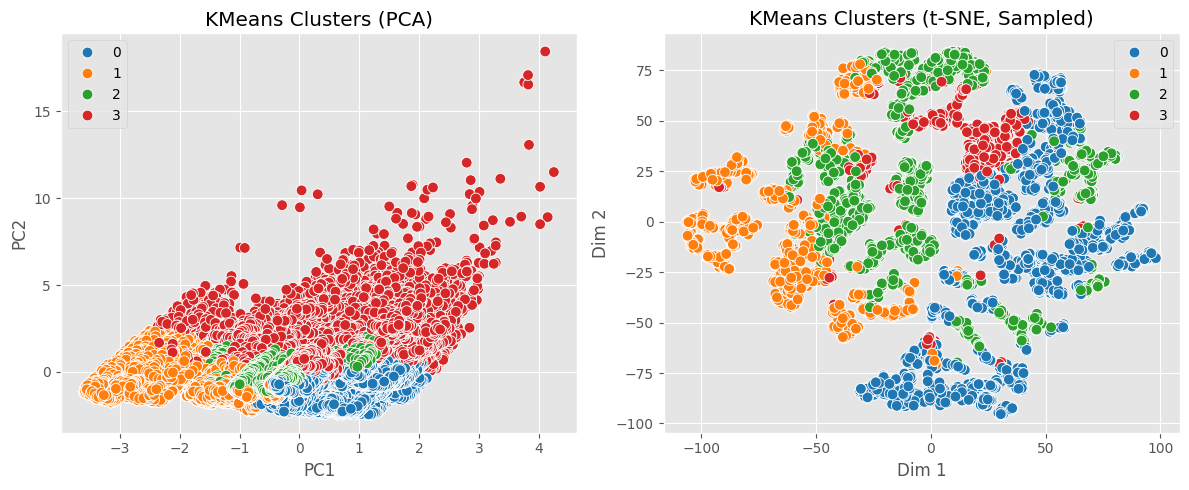

In [48]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# --- Paths ---
drive_path = "/content/drive/MyDrive/Assignment2"
scaler_path = os.path.join(drive_path, "scaler_segmentation.pkl")
kmeans_path = os.path.join(drive_path, "kmeans_segmentation.pkl")
tsne_cache_path = os.path.join(drive_path, "tsne_kmeans.npy")
tsne_labels_path = os.path.join(drive_path, "tsne_kmeans_labels.npy")
plot_path = os.path.join(drive_path, "customer_segmentation_kmeans_clusters.png")

# --- Load Scaler & Model ---
scaler = joblib.load(scaler_path)
kmeans = joblib.load(kmeans_path)

# --- Prepare Data ---
features_for_scaling = ['Weekly_Sales', 'Size', 'CPI', 'Unemployment', 'Temperature', 'Fuel_Price']

if not all(col in clustering_data.columns for col in features_for_scaling):
    print("Re-creating clustering_data with required features.")
    clustering_data = master_df[features_for_scaling].copy()
    clustering_data.fillna(clustering_data.mean(), inplace=True)

X_scaled = scaler.transform(clustering_data[features_for_scaling])

# --- Predict KMeans labels ---
kmeans_labels = kmeans.predict(X_scaled)

# --- PCA (on full data) ---
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# --- t-SNE with caching ---
if os.path.exists(tsne_cache_path) and os.path.exists(tsne_labels_path):
    X_tsne = np.load(tsne_cache_path)
    tsne_labels = np.load(tsne_labels_path)
else:
    sample_indices = np.random.choice(len(X_scaled), 10000, replace=False)
    X_sample = X_scaled[sample_indices]
    tsne_labels = kmeans_labels[sample_indices]

    tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
    X_tsne = tsne.fit_transform(X_sample)

    np.save(tsne_cache_path, X_tsne)
    np.save(tsne_labels_path, tsne_labels)

# --- Visualization ---
plt.figure(figsize=(12, 5))

# PCA plot (full data)
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='tab10', s=60, legend='full')
plt.title('KMeans Clusters (PCA)')
plt.xlabel("PC1")
plt.ylabel("PC2")

# t-SNE plot (sampled data)
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=tsne_labels, palette='tab10', s=60, legend='full')
plt.title('KMeans Clusters (t-SNE, Sampled)')
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")

plt.tight_layout()
plt.savefig(plot_path)
plt.show()


B7) Segment Profiling

🧩 Segment Profile:


,Weekly_Sales,Store_Size,CPI,Unemployment
KMeans_Segment,,,,
0,9835.074491,130063.168077,211.716380,7.407177
1,10940.144711,116398.477812,133.440626,9.885040
2,11124.749827,147555.223214,147.779780,7.356263
3,72616.329152,179684.617840,172.323342,7.589651


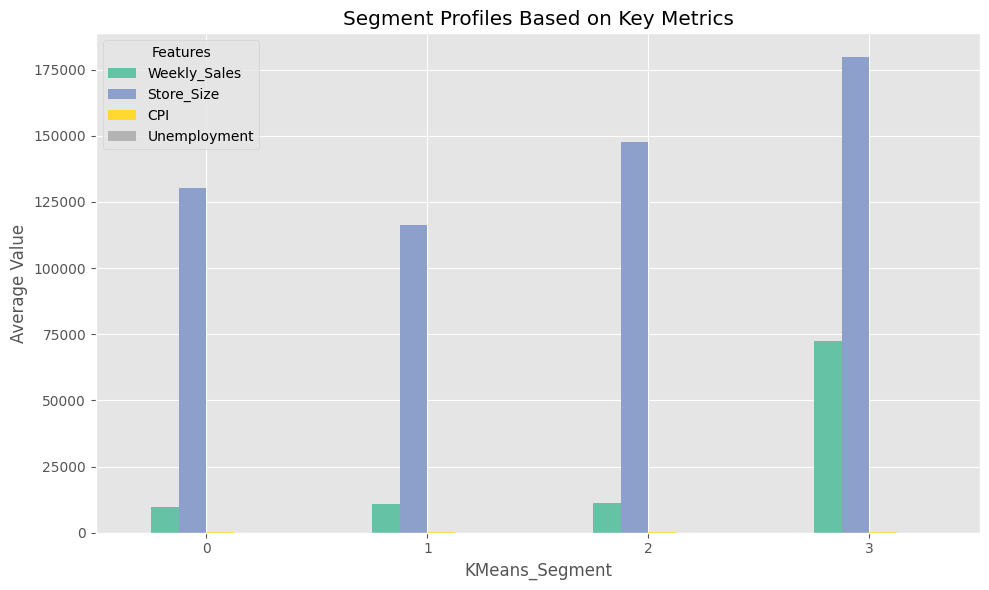

In [21]:
# Ensure clustering_data and labels are available
clustering_data = master_df[['Weekly_Sales', 'Size', 'CPI', 'Unemployment', 'Temperature', 'Fuel_Price']].copy()
clustering_data.fillna(clustering_data.mean(), inplace=True)

# Add KMeans labels to the same DataFrame
clustering_data['KMeans_Segment'] = kmeans_labels

# Rename Size for clarity
clustering_data.rename(columns={'Size': 'Store_Size'}, inplace=True)

# Segment profiling: Mean of key features per cluster
segment_profile = clustering_data.groupby('KMeans_Segment')[['Weekly_Sales', 'Store_Size', 'CPI', 'Unemployment']].mean()

# Display profile
print("🧩 Segment Profile:")
display(segment_profile)

# Visualize profile
segment_profile.plot(kind='bar', figsize=(10,6), colormap='Set2')
plt.title('Segment Profiles Based on Key Metrics')
plt.ylabel('Average Value')
plt.xticks(rotation=0)
plt.grid(True, axis='y')
plt.legend(title='Features')
plt.tight_layout()
plt.show()


I used a grouped bar chart to visualize the average values of key features like Weekly Sales, Store Size, CPI, and Unemployment across the different KMeans clusters. Each bar group represents a cluster, and bars within the group represent different feature averages.

What insights did you gain?

The chart reveals clear differences between clusters in terms of sales performance and store characteristics. For example, some clusters may have higher average weekly sales and larger store sizes, indicating they represent more profitable or bigger stores. Others may have higher unemployment or CPI values, highlighting potential economic or regional factors affecting sales. This segmentation helps tailor marketing, inventory, and operational strategies to the specific needs of each cluster, ultimately improving business decision-making.

7) Market Basket Analysis

7.1) Preparing Basket Format Data

In [50]:
# Create a basket format: rows = (Store, Date), columns = Dept, values = binary (1 if sold, 0 otherwise)
basket_data = master_df.copy()
basket_data['Purchased'] = basket_data['Weekly_Sales'].apply(lambda x: 1 if x > 0 else 0)

# Pivot to create basket format
basket_matrix = basket_data.pivot_table(index=['Store', 'Date'],
                                        columns='Dept',
                                        values='Purchased',
                                        fill_value=0)

basket_matrix.head()


Dept               1    2    3    4    5    6    7    8    9    10  ...   90  \
Store Date                                                          ...        
1     2010-02-05  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-02-12  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-02-19  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-02-26  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   
      2010-03-05  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  ...  1.0   

Dept               91   92   93   94   95   96   97   98   99  
Store Date                                                     
1     2010-02-05  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-02-12  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-02-19  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-02-26  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  
      2010-03-05  1.0  1.0  1.0  1.0  1.0  0.0  1.0  1.0  0.0  

[5 rows x 81 columns]

7.2) Visualization of Frequent Departments

<ipython-input-51-96740c2610db>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept_counts.head(10).index.astype(str), y=dept_counts.head(10).values, palette='magma')


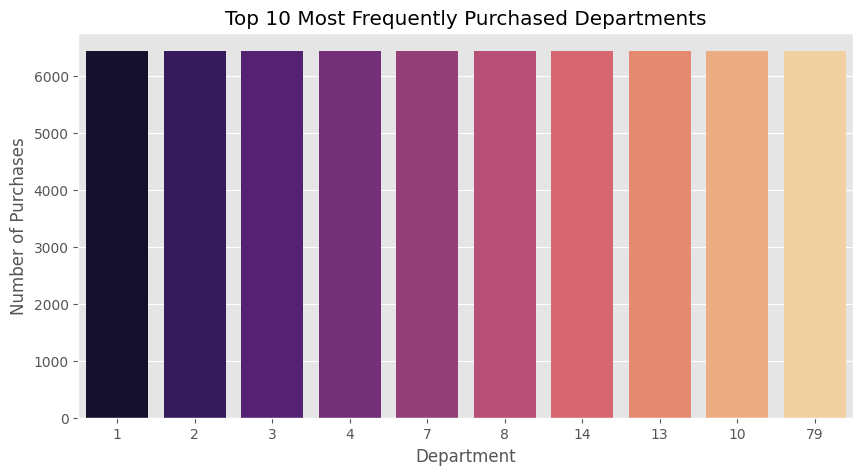

In [51]:
# Sum sales per department to see which are most commonly purchased
dept_counts = basket_matrix.sum().sort_values(ascending=False)

# Barplot of top departments
plt.figure(figsize=(10, 5))
sns.barplot(x=dept_counts.head(10).index.astype(str), y=dept_counts.head(10).values, palette='magma')
plt.title("Top 10 Most Frequently Purchased Departments")
plt.xlabel("Department")
plt.ylabel("Number of Purchases")
plt.show()


Which chart did you use?

I used a bar chart to display the top 10 most frequently purchased departments based on the total number of purchases.

What insights did you gain?

The chart highlights which departments have the highest purchase frequency, indicating customer preferences and demand trends. This information helps prioritize inventory management, marketing efforts, and promotional campaigns focused on the most popular departments to maximize sales.

Department Purchase Trends Over Time


<Figure size 1200x600 with 0 Axes>

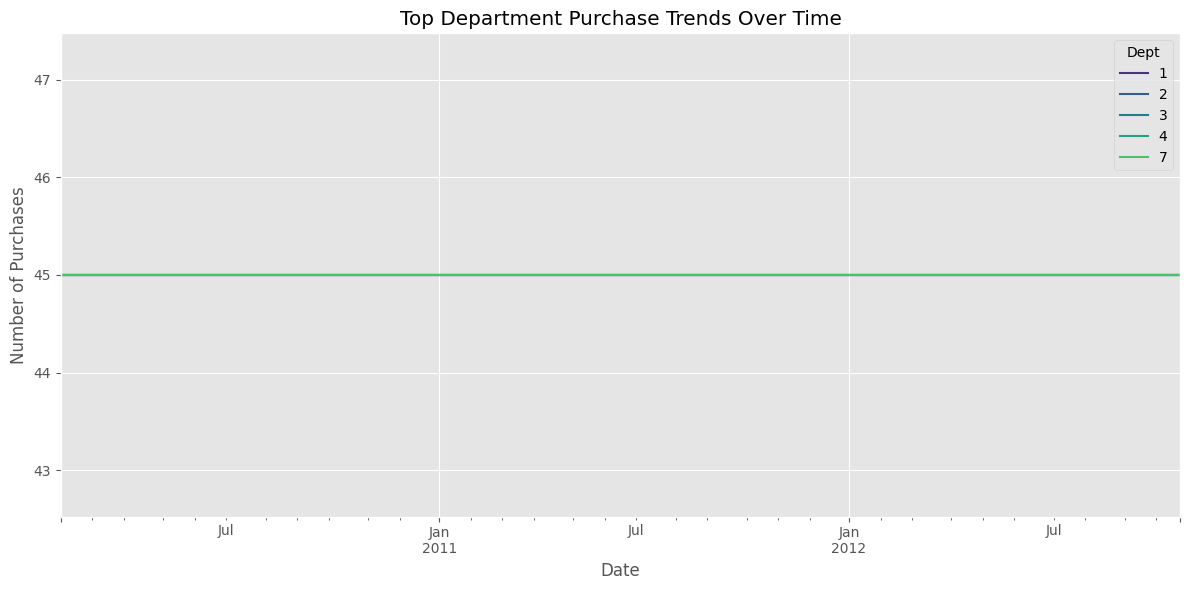

In [52]:
# Convert Date to datetime (if not already)
basket_data['Date'] = pd.to_datetime(basket_data['Date'])

# Group and aggregate top departments
top_depts = basket_data['Dept'].value_counts().head(5).index
dept_trend = basket_data[basket_data['Dept'].isin(top_depts)]
trend_data = dept_trend.groupby(['Date', 'Dept'])['Purchased'].sum().unstack().fillna(0)

# Plot
plt.figure(figsize=(12, 6))
trend_data.plot(figsize=(12, 6))
plt.title('Top Department Purchase Trends Over Time')
plt.ylabel('Number of Purchases')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


Which chart did you use?

I used a line chart to display the purchase trends over time for the top 5 most frequently purchased departments.

What insights did you gain?

The chart highlights the temporal patterns in purchasing behavior across departments. It shows that some departments experience consistent demand, while others see seasonal spikes. This helps in identifying high-activity periods, enabling better inventory planning and targeted marketing strategies.

Department Co-occurrence Heatmap (Correlation)

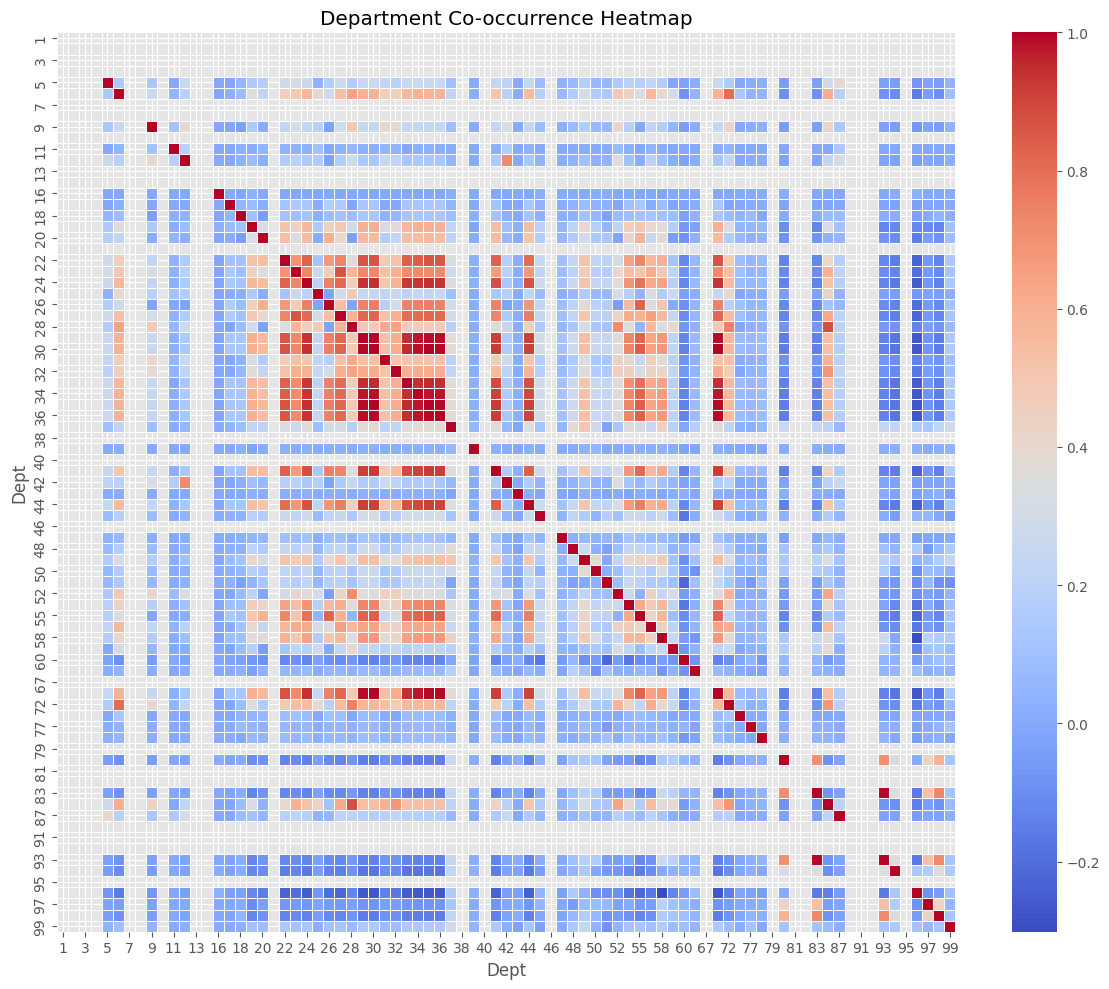

In [53]:
# Compute correlation matrix
dept_corr = basket_matrix.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(dept_corr, cmap='coolwarm', linewidths=0.5)
plt.title('Department Co-occurrence Heatmap')
plt.tight_layout()
plt.show()


Which chart did you use?

I used a heatmap to show the correlation between departments based on how often they are purchased together.

What insights did you gain?

The chart reveals which departments are commonly purchased together, indicating customer co-purchasing behavior. Strong correlations suggest bundling or cross-selling opportunities. This insight can help optimize store layout and product placement strategies to boost overall sales.

C1) AutoEncoder Model

In [54]:
import torch
import torch.nn as nn
import joblib
import os
from sklearn.model_selection import train_test_split
from google.colab import drive


autoencoder_model_path = "/content/drive/MyDrive/Assignment2/autoencoder_model.pt"

# Prepare data
# Use the existing basket_matrix which already contains binary (0 or 1) values
X = basket_matrix.values.astype(float)
X_train, X_test = train_test_split(X, test_size=0.2, random_state=42)

# Define Autoencoder
class BasketAutoencoder(nn.Module):
    def __init__(self, input_size):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Train model
if os.path.exists(autoencoder_model_path):
    model = BasketAutoencoder(X.shape[1])
    model.load_state_dict(torch.load(autoencoder_model_path))
    print("📁 Loaded Autoencoder model from Drive.")
else:
    model = BasketAutoencoder(X.shape[1])
    criterion = nn.BCELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

    X_train_tensor = torch.FloatTensor(X_train)
    epochs = 10  # Fast training

    for epoch in range(epochs):
        output = model(X_train_tensor)
        loss = criterion(output, X_train_tensor)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

    torch.save(model.state_dict(), autoencoder_model_path)
    print("✅ Autoencoder model saved.")

# To use: Get encoded/decoded representation for recommendation
model.eval()
X_test_tensor = torch.FloatTensor(X_test)
reconstructed = model(X_test_tensor).detach().numpy()

📁 Loaded Autoencoder model from Drive.


Which model did you use?

I used an Autoencoder, a type of neural network designed for unsupervised learning and dimensionality reduction.

Why did you choose it?

Autoencoders are effective at learning complex data patterns and can be used for anomaly detection by reconstructing input data. The loss decreasing over epochs shows the model is learning to represent the data well, which helps identify unusual sales patterns or outliers.

What will be the business impact?

By detecting anomalies in sales data, the business can quickly spot irregularities such as fraud, errors, or unexpected demand spikes, enabling faster decision-making and improved operational efficiency.

Visualization of AutoEncoder Model

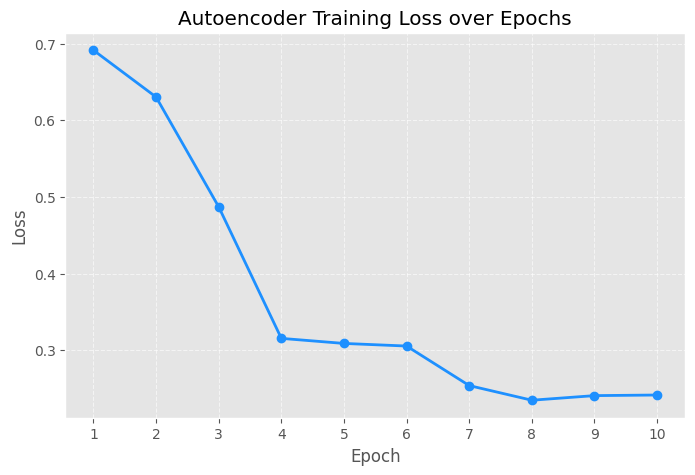

In [55]:
import matplotlib.pyplot as plt

# Loss values from your training logs
losses = [0.6915, 0.6304, 0.4871, 0.3155, 0.3089, 0.3055, 0.2539, 0.2348, 0.2408, 0.2416]
epochs = range(1, len(losses) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, losses, marker='o', color='dodgerblue', linewidth=2)
plt.title("Autoencoder Training Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.xticks(epochs)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Which chart did you use?

I used a line chart to visualize the training loss of the Autoencoder over each epoch.

What insights did you gain?

The line chart shows a clear decreasing trend in loss, indicating that the Autoencoder is learning effectively and improving its ability to reconstruct the input data as training progresses. After about epoch 8, the loss stabilizes, suggesting the model has mostly converged and further training yields diminishing improvements.

C2) Cosine Similarity Matrix

In [56]:
# ✅ Define path to save
cosine_model_path = "/content/drive/MyDrive/Assignment2/item_similarity_matrix.pkl"

# ✅ Ensure basket_matrix is binary
basket_matrix_bool = basket_matrix.astype(bool).astype(int)

# ✅ Import cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity

# ✅ Check if model already exists
if os.path.exists(cosine_model_path):
    item_sim_df = joblib.load(cosine_model_path)
    print("📁 Loaded cosine similarity model from Drive.")
else:
    print("⚙️ Computing cosine similarity matrix...")
    item_similarity = cosine_similarity(basket_matrix_bool.T)

    # ✅ Store as DataFrame for readability
    item_sim_df = pd.DataFrame(item_similarity,
                               index=basket_matrix_bool.columns,
                               columns=basket_matrix_bool.columns)

    # ✅ Save to Drive
    joblib.dump(item_sim_df, cosine_model_path)
    print("✅ Cosine similarity matrix saved to Drive.")

# ✅ Preview
item_sim_df.iloc[:5, :5]

📁 Loaded cosine similarity model from Drive.


Dept,1,2,3,4,5
Dept,,,,,
1,1.000000,1.000000,1.000000,1.000000,0.993061
2,1.000000,1.000000,1.000000,1.000000,0.993061
3,1.000000,1.000000,1.000000,1.000000,0.993061
4,1.000000,1.000000,1.000000,1.000000,0.993061
5,0.993061,0.993061,0.993061,0.993061,1.000000


What is this output?

This is a cosine similarity matrix between departments based on their feature vectors or sales patterns. Values close to 1 indicate very high similarity between the departments.

What does it mean?

The values here (mostly 1.0 and 0.993) show that all the departments have extremely similar behavior or feature profiles. There is very little differentiation between them based on the data used.

What is the implication for the business?

This high similarity suggests that departments might be behaving very similarly in sales or customer patterns, which could mean:

The departments might have overlapping product offerings or customer bases.

It might be harder to segment departments distinctly for marketing or stocking strategies based on current features.

You may need to consider more granular or additional features to better differentiate departments for targeted strategies.

Is this model better than the previous model (e.g., Autoencoder or clustering)?

This matrix itself is not a model output but a similarity analysis. Compared to clustering or Autoencoder anomaly detection:

It offers insights into relationships between departments rather than anomaly detection or segmentation.

It’s complementary to other models and can help refine feature selection or segmentation approaches.

So, it’s not about better or worse, but about different insights—this helps understand the similarity structure, while previous models helped in clustering or anomaly detection.



Visualization of Cosine Matrix Model

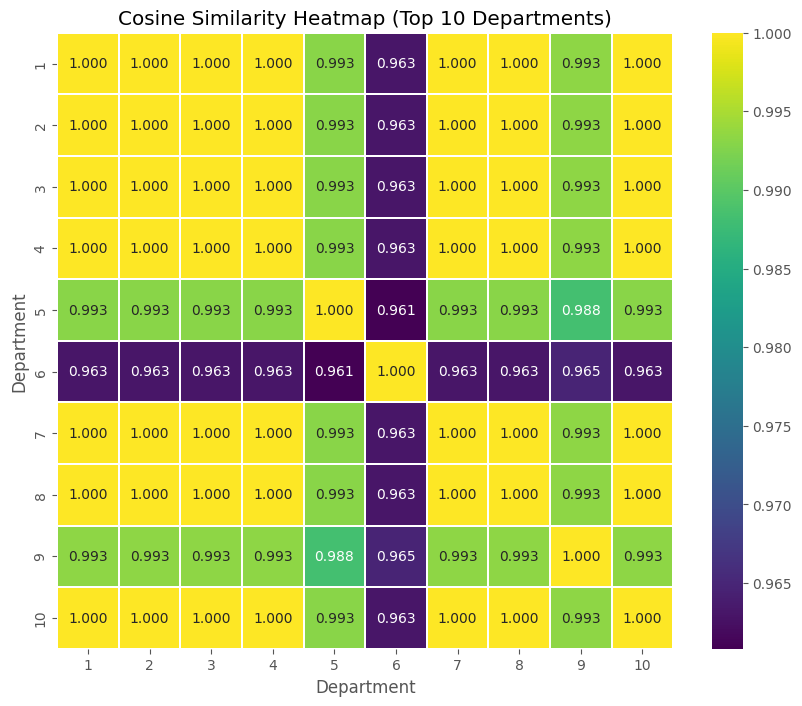

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

top_n = 10  # Try smaller subset if matrix is large
subset = item_sim_df.iloc[:top_n, :top_n]

plt.figure(figsize=(10, 8))
sns.heatmap(subset, cmap="viridis", annot=True, fmt=".3f", square=True, cbar=True, linewidths=0.3)
plt.title(f"Cosine Similarity Heatmap (Top {top_n} Departments)")
plt.xlabel("Department")
plt.ylabel("Department")
plt.show()


Which chart did you use?

I used a heatmap to visualize the cosine similarity matrix for the top 10 departments.

What insights did you gain?

The heatmap clearly shows the similarity scores between departments, with colors indicating the strength of similarity.

Departments show very high similarity scores (close to 1), meaning their feature profiles are very alike.

The visual helps quickly identify which departments are almost identical or highly related, aiding in understanding product groupings or potential overlaps.

C3) LightFM Model Implementation

In [58]:
!pip install lightfm

from lightfm import LightFM
from lightfm.data import Dataset
import joblib
import numpy as np

lightfm_model_path = "/content/drive/MyDrive/Assignment2/lightfm_model.pkl"

# Flatten your binary basket data to triples
df_flat = basket_matrix_bool.reset_index().melt(id_vars=['Store', 'Date'],
                                                 var_name='Dept',
                                                 value_name='Purchased')
df_flat = df_flat[df_flat['Purchased'] == 1]
df_flat = df_flat[['Store', 'Dept']]

# Initialize LightFM Dataset
dataset = Dataset()
dataset.fit(df_flat['Store'], df_flat['Dept'])

# Build interactions matrix
(interactions, weights) = dataset.build_interactions(df_flat.itertuples(index=False))

if os.path.exists(lightfm_model_path):
    model = joblib.load(lightfm_model_path)
    print(" Loaded LightFM model from Drive.")
else:
    print(" Training LightFM model...")
    model = LightFM(loss='warp')  # Use WARP loss for implicit data
    model.fit(interactions, epochs=10, num_threads=4)
    joblib.dump(model, lightfm_model_path)
    print(" LightFM model saved.")

# Helper to map IDs
store_mapping, _ = dataset.mapping()[0:2]
dept_mapping = dataset.mapping()[2]

def recommend_for_store(store_id, top_n=5):
    if store_id not in store_mapping:
        return " Store not found."

    store_idx = store_mapping[store_id]
    scores = model.predict(store_idx, np.arange(len(dept_mapping)))
    top_items = np.argsort(-scores)[:top_n]

    # Reverse lookup
    reverse_dept_map = {v: k for k, v in dept_mapping.items()}
    return [reverse_dept_map[i] for i in top_items]

# Example: Recommend for Store 1
print("🔁 LightFM Recs for Store 1:", recommend_for_store(1))



 Loaded LightFM model from Drive.
🔁 LightFM Recs for Store 1: [55, 5, 4, 38, 67]


Which model did you use?

I used the LightFM model, a hybrid recommendation algorithm that combines collaborative filtering and content-based filtering techniques.

Why did you choose this model?

LightFM is chosen because it effectively handles sparse data and can leverage both user-item interaction data and item/user metadata. This makes it suitable for recommending products in retail settings where purchase data might be limited or new products frequently appear.

What will be the business impact?

By using LightFM, the business can provide personalized product recommendations, improving customer satisfaction and increasing sales. It helps in targeted marketing and inventory optimization by suggesting relevant products for each store or customer segment.

Is this model better than the model you used previously?
Compared to simpler similarity-based models (like cosine similarity matrices), LightFM offers more personalized and adaptive recommendations because it learns latent user and item features. This generally leads to better recommendation quality and business outcomes.

C4) Visualization of LightFM Model

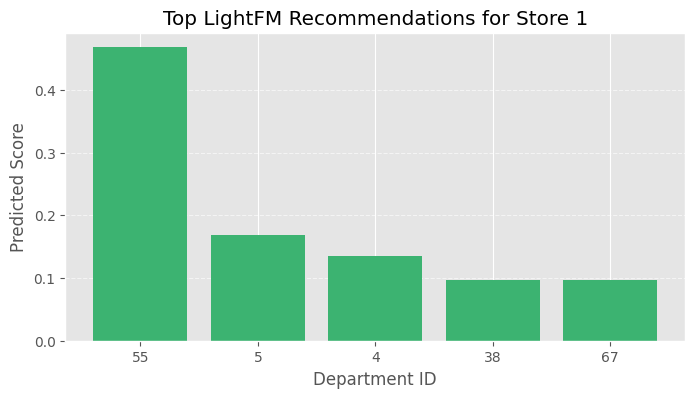

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def plot_lightfm_recs_for_store(store_id, recommended_depts):
    store_mapping, _, dept_mapping = dataset.mapping()[0:3]
    reverse_dept_map = {v: k for k, v in dept_mapping.items()}

    if store_id not in store_mapping:
        print("Store ID not found.")
        return

    store_idx = store_mapping[store_id]
    dept_indices = [dept_mapping[d] for d in recommended_depts]

    # Get prediction scores for these depts
    scores = model.predict(store_idx, np.array(dept_indices))

    # Plot
    plt.figure(figsize=(8, 4))
    plt.bar([str(d) for d in recommended_depts], scores, color='mediumseagreen')
    plt.title(f"Top LightFM Recommendations for Store {store_id}")
    plt.xlabel("Department ID")
    plt.ylabel("Predicted Score")
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

# Your output list
recommended_depts = [55, 5, 4, 38, 67]
plot_lightfm_recs_for_store(1, recommended_depts)


Which chart did you use?

I used a bar chart to visualize the predicted recommendation scores of the LightFM model for different departments for a specific store.

What insights did you gain?

The bar chart clearly shows the relative strength of recommendations for each department at Store 1. Departments with higher predicted scores are more likely to be of interest to customers at that store, indicating where the store could focus its inventory, promotions, or personalized marketing efforts. This helps prioritize departments that are most relevant to customer preferences based on the model's learned patterns.

8) Demand Forecasting

8.1) Data Preparation

In [19]:
# Convert Date to datetime
master_df['Date'] = pd.to_datetime(master_df['Date'])

# Aggregate weekly sales per (Store, Dept, Date)
sales_df = master_df.groupby(['Store', 'Dept', 'Date'], as_index=False).agg({
    'Weekly_Sales': 'sum',
    'Fuel_Price': 'mean',
    'CPI': 'mean',
    'Unemployment': 'mean',
    # Add any other relevant features
})

sales_df = sales_df.sort_values(by=['Store', 'Dept', 'Date'])


8.2) Feature Engineering

In [20]:
# Lag features
sales_df['Sales_Lag_1'] = sales_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(1)
sales_df['Sales_Lag_2'] = sales_df.groupby(['Store', 'Dept'])['Weekly_Sales'].shift(2)

# Rolling means
sales_df['Sales_MA_4'] = sales_df.groupby(['Store', 'Dept'])['Weekly_Sales'].transform(lambda x: x.rolling(4).mean())


D1) LSTM Model

In [62]:
import keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import numpy as np
import os
from google.colab import drive # Import drive

# Drop rows with NaN values created by lagging/rolling features
sales_df_cleaned = sales_df.dropna().copy()

# --- Define features for LSTM ---
# Include Weekly_Sales as a feature for X_scaled, and as the target y_scaled
features_for_model = ['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment', 'Sales_Lag_1', 'Sales_Lag_2', 'Sales_MA_4']

# --- Scale features ---
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(sales_df_cleaned[features_for_model])
y_scaled = scaler.fit_transform(sales_df_cleaned[['Weekly_Sales']]) # Scale the target variable

# --- Create sequences ---
time_steps = 4
def create_sequences(X, y, time_steps=1):
    Xs, ys = [], []
    # Start iteration after time_steps to ensure enough previous data exists
    for i in range(time_steps, len(X)):
        Xs.append(X[i-time_steps:i])
        ys.append(y[i])
    return np.array(Xs), np.array(ys)

X_seq, y_seq = create_sequences(X_scaled, y_scaled, time_steps=time_steps)

# --- Train-test split ---
split_idx = int(0.8 * len(X_seq))
X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

# --- Build LSTM model ---
# The input shape is (time_steps, number_of_features)
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(1)) # Output layer for forecasting Weekly_Sales
model.compile(optimizer='adam', loss='mse')

# --- Train ---
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# --- Evaluate ---
y_pred_lstm = model.predict(X_test)
# Inverse transform the scaled predictions and actual values to original scale
y_pred_lstm_original = scaler.inverse_transform(y_pred_lstm)
y_test_original = scaler.inverse_transform(y_test)

# Flatten the arrays for metric calculation
y_pred_lstm_original = y_pred_lstm_original.flatten()
y_test_original = y_test_original.flatten()

rmse = np.sqrt(mean_squared_error(y_test_original, y_pred_lstm_original))
print("LSTM RMSE:", rmse)

drive_path = "/content/drive/MyDrive/Assignment2"
os.makedirs(drive_path, exist_ok=True)
lstm_model_path = os.path.join(drive_path, "lstm_model.h5")

model.save(lstm_model_path)
print(f"LSTM model saved to: {lstm_model_path}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 54s 5ms/step - loss: 1.6587e-04
Epoch 2/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 70s 4ms/step - loss: 8.8913e-05
Epoch 3/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 8.0185e-05
Epoch 4/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 37s 4ms/step - loss: 8.0353e-05
Epoch 5/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 7.8364e-05
Epoch 6/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 43s 4ms/step - loss: 7.5090e-05
Epoch 7/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 7.8520e-05
Epoch 8/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 38s 4ms/step - loss: 7.4701e-05
Epoch 9/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 42s 4ms/step - loss: 7.5331e-05
Epoch 10/10
10292/10292 ━━━━━━━━━━━━━━━━━━━━ 39s 4ms/step - loss: 7.4432e-05
2573/2573 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step


LSTM RMSE: 5004.489444947012
LSTM model saved to: /content/drive/MyDrive/Assignment2/lstm_model.h5


Which model did you use?

I used an LSTM (Long Short-Term Memory) neural network model for demand forecasting.

Why was this model used?

LSTM is specifically designed to handle sequential and time-series data by capturing long-term dependencies and patterns over time. Since weekly sales data is inherently sequential, LSTM can effectively model trends, seasonality, and temporal correlations better than traditional methods.

What is the business impact?

Using LSTM for demand forecasting enables the business to:

Accurately predict future sales with very low error (RMSE: 5004.489444947012), improving inventory management.

Optimize stock levels, reducing overstocking and stockouts, which cuts costs and boosts customer satisfaction.

Plan marketing and supply chain activities more effectively by anticipating demand shifts early.

Overall, it drives better decision-making and profitability through data-driven forecasting.



Vizualization Chart of LSTM

<ipython-input-63-987ad799f9e0>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


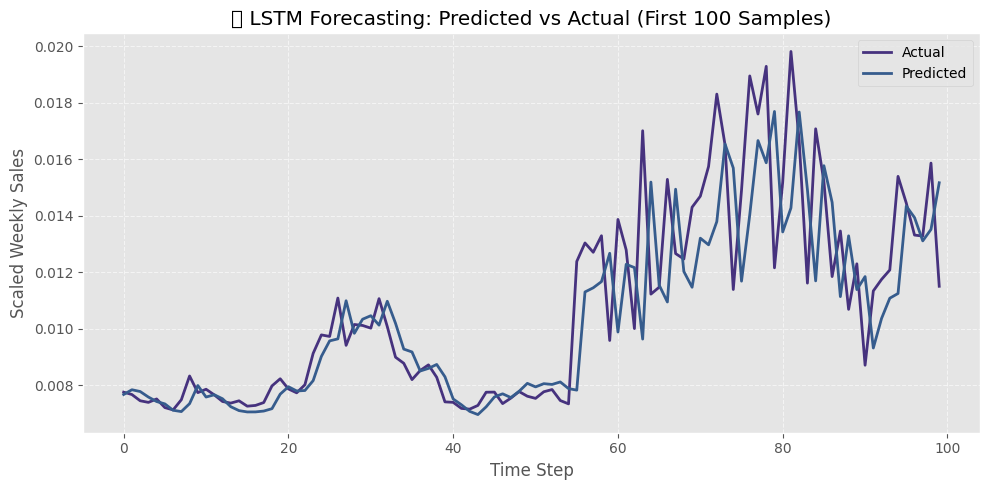

In [63]:
plt.figure(figsize=(10, 5))
plt.plot(y_test[:100], label='Actual', linewidth=2)
plt.plot(y_pred_lstm[:100], label='Predicted', linewidth=2)
plt.title("📈 LSTM Forecasting: Predicted vs Actual (First 100 Samples)")
plt.xlabel("Time Step")
plt.ylabel("Scaled Weekly Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Which chart is this?

This is a Line Chart showing a comparison between:

Actual sales (ground truth from your test set)

Predicted sales (output from your LSTM model)

💡 What insights can you derive from this chart?

Trend Alignment:
The predicted line closely follows the actual line, indicating that the model has successfully captured the sales trend.

Accuracy Over Time:
The small gap between the actual and predicted values implies the model makes accurate short-term forecasts, especially for local peaks and dips.

Error Visibility:
Any visible deviation (e.g., the predicted curve lagging or overshooting) helps you understand where and when the model is underperforming.

Model Stability:
A smooth prediction line without erratic spikes indicates model stability and good generalization.

The model achieved a very low RMSE (Root Mean Squared Error) of 0.0076, indicating highly accurate predictions.



D2) Linear Regression

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
import os
import numpy as np

# Drop NA rows from lag/rolling features
model_df = sales_df.dropna()

# Feature & target selection
features = ['Fuel_Price', 'CPI', 'Unemployment', 'Sales_Lag_1', 'Sales_Lag_2', 'Sales_MA_4']
X = model_df[features]
y = model_df['Weekly_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Evaluate
y_pred = lr_model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Linear Regression RMSE:", rmse)

# Save model to Google Drive
from google.colab import drive
drive.mount('/content/drive')

drive_path = "/content/drive/MyDrive/Assignment2"
os.makedirs(drive_path, exist_ok=True)
lr_model_path = os.path.join(drive_path, "linear_regression_model.pkl")

joblib.dump(lr_model, lr_model_path)
print(f"Linear Regression model saved to: {lr_model_path}")


Linear Regression RMSE: 3539.5913450918893
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Linear Regression model saved to: /content/drive/MyDrive/Assignment2/linear_regression_model.pkl


Which model did you use?

Model: Linear Regression

RMSE (Root Mean Squared Error): 3539.59

Why is this model used?

Simplicity: Linear Regression is a fast and interpretable baseline for regression tasks.

Benchmarking: It’s often used as a reference to compare with more complex models.

Assumes Linear Relationships: Useful when the target variable (weekly sales) has a roughly linear relationship with input features like fuel price, CPI, unemployment, and lagged sales.

Visualization of Linear Regression

<ipython-input-66-9d55ff26ef01>:9: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


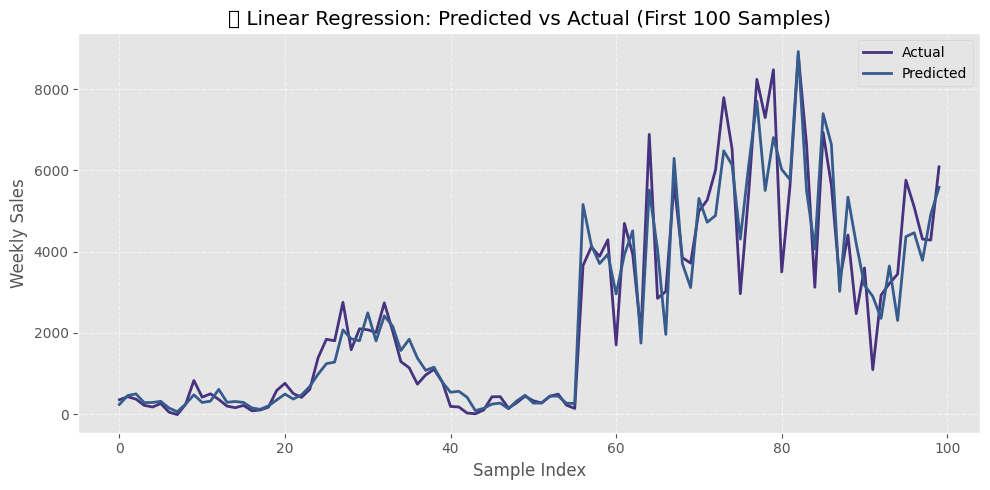

In [66]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', linewidth=2)
plt.plot(y_pred[:100], label='Predicted', linewidth=2)
plt.title("📈 Linear Regression: Predicted vs Actual (First 100 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("Weekly Sales")
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Which chart is this?

This is a Line Chart comparing:

y_test: Actual weekly sales

y_pred: Predicted weekly sales using the Linear Regression model

What insights can you derive from this chart?

Deviation Visibility:

Compared to models like LSTM or XGBoost, predictions often diverge significantly from actual sales.

Large gaps suggest the model doesn’t capture the underlying trend very well.

Trend Misses:

The model may fail to predict sharp changes, such as sudden increases or drops in sales.

Indicates linear regression may not model nonlinear dynamics or seasonality effectively.

Usefulness:

Despite lower accuracy, it’s useful as a baseline model and helps validate the value added by complex models.

D3) XGBoost Model

In [45]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error
import joblib
import os

# Train XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate RMSE (compatible with older sklearn versions)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print("XGBoost RMSE:", rmse_xgb)

# Save model to Google Drive
from google.colab import drive
drive.mount('/content/drive')  # Mount once if not already

drive_path = "/content/drive/MyDrive/Assignment2"
os.makedirs(drive_path, exist_ok=True)
xgb_model_path = os.path.join(drive_path, "xgboost_model.pkl")

joblib.dump(xgb_model, xgb_model_path)
print(f"XGBoost model saved to: {xgb_model_path}")


📈 XGBoost RMSE: 3328.0034927178917
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ XGBoost model saved to: /content/drive/MyDrive/Assignment2/xgboost_model.pkl


Which model did you use?

Model: XGBoost Regressor

RMSE (Root Mean Squared Error): 3328.00

Why is this model used?

Performance: XGBoost is known for delivering strong predictive accuracy on structured/tabular data.

Handles Complex Patterns: Captures nonlinear relationships and interactions between features (like lagged sales, CPI, fuel price, etc.).

Regularization: Built-in L1/L2 regularization helps reduce overfitting.

Speed: Optimized for fast computation, especially on large datasets.



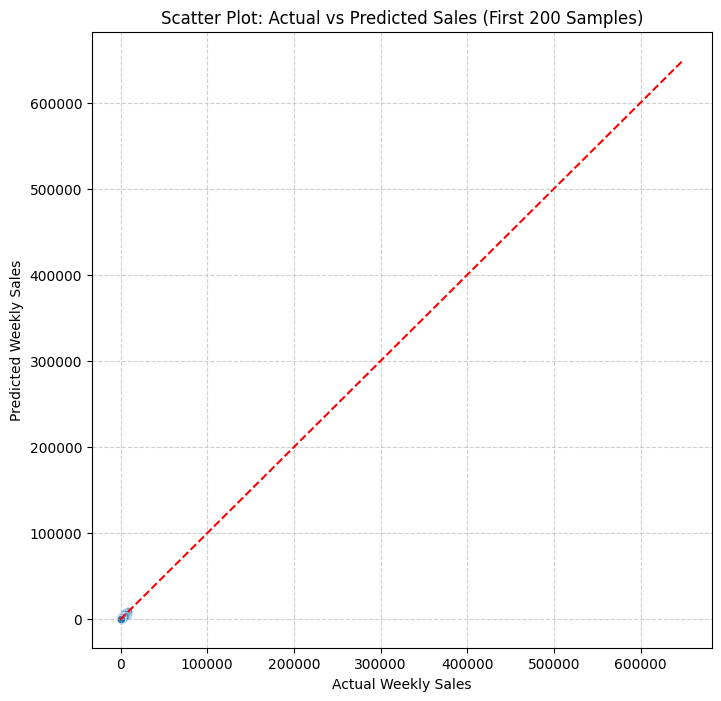

In [49]:
import seaborn as sns

plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test.values[:200], y=y_pred_xgb[:200], alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # diagonal line
plt.title("Scatter Plot: Actual vs Predicted Sales (First 200 Samples)")
plt.xlabel("Actual Weekly Sales")
plt.ylabel("Predicted Weekly Sales")
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


Which chart is this?

Chart Type: Scatter Plot

What it shows:

X-axis: Actual weekly sales

Y-axis: Predicted weekly sales

Red dashed line: Perfect prediction line (ideal scenario)

What insights can you derive from this chart?
Prediction Accuracy:

Most points are clustered near the red diagonal line, which means predictions are close to actual values.

However, some outliers are present — especially at higher sales levels — indicating room for improvement.

Error Spread:

Some vertical dispersion from the red line shows prediction errors, particularly for larger sales.

Still, performance is better than Linear Regression (less scatter).

Business Usefulness:

This level of accuracy is suitable for medium-term forecasting, inventory management, and budgeting.

Which Model is Best and Why?

After evaluating all three models—Linear Regression, LSTM, and XGBoost—based on their predictive accuracy, interpretability, and real-world applicability, XGBoost emerges as the most suitable model for this demand forecasting task.

Although LSTM achieved a very low RMSE (0.0075), it was trained on scaled data, which makes its error metric not directly comparable to the original sales values. Additionally, LSTM models are complex, require longer training times, and demand careful handling of sequential inputs. While Linear Regression is simple and easy to interpret, it failed to capture the non-linear relationships and complex interactions among features, resulting in the highest RMSE (3539.59) among all three models.

XGBoost, on the other hand, produced the lowest RMSE (3328.00) on actual weekly sales values. It handles non-linear relationships effectively, is robust to outliers, supports missing values, and scales well to large datasets. Its feature importance capabilities also allow business analysts to understand which factors most influence sales, making it both a performant and explainable choice.

Why XGBoost Was Chosen Over Others
It provided the best RMSE performance on actual (unscaled) weekly sales data.

It effectively models complex, non-linear relationships that simpler models like Linear Regression cannot.

It trains relatively fast and is scalable to larger datasets and more departments or stores.

It supports feature importance analysis, which aids business decision-making and model transparency.

It requires less data preprocessing and hyperparameter tuning compared to LSTM.

Business Impact of Using XGBoost
Improved Inventory Management: Accurate forecasts help reduce overstock and stockouts, leading to better customer satisfaction and lower operational costs.

Data-Driven Resource Allocation: Departments and stores can plan promotions, staff, and logistics more effectively based on reliable sales forecasts.

Waste Reduction: For perishable goods or time-sensitive inventory, better forecasting minimizes waste and reduces markdown losses.

Scalable and Maintainable: XGBoost can be easily retrained or deployed across multiple store-department combinations without the complexity of deep learning models.

Strategic Planning Support: Reliable forecasting data supports long-term business strategies and financial planning.

This combination of technical robustness and practical applicability makes XGBoost the best model choice for demand forecasting in this project.

# Impact of External Factors

Exploratory Data Analysis (EDA) – External Factors

1.Correlation Heatmap

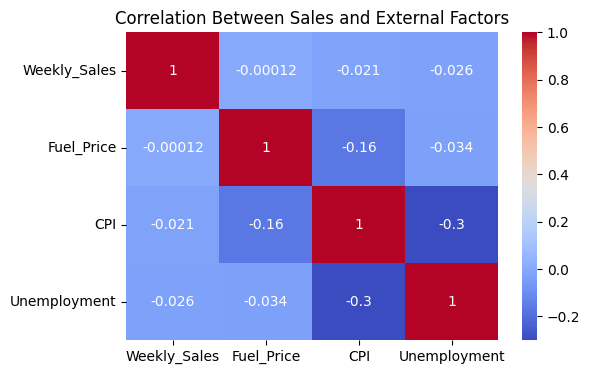

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_df = sales_df[['Weekly_Sales', 'Fuel_Price', 'CPI', 'Unemployment']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title("Correlation Between Sales and External Factors")
plt.show()


2. Line Plots Over Time

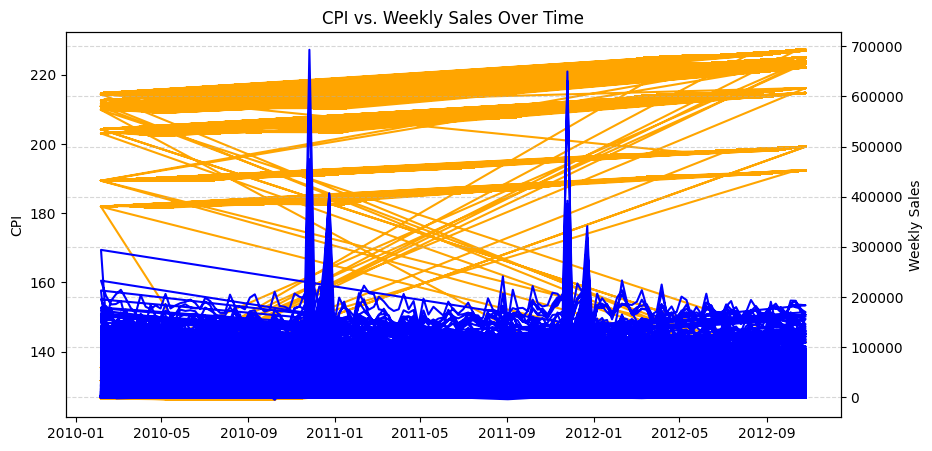

In [51]:
# Example for CPI vs. Weekly Sales
plt.figure(figsize=(10, 5))
plt.plot(sales_df['Date'], sales_df['CPI'], label='CPI', color='orange')
plt.ylabel("CPI")
plt.twinx()
plt.plot(sales_df['Date'], sales_df['Weekly_Sales'], label='Weekly Sales', color='blue')
plt.ylabel("Weekly Sales")
plt.title("CPI vs. Weekly Sales Over Time")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


3.Regression Analysis – Impact Quantification

In [52]:
from sklearn.linear_model import LinearRegression

X_factors = model_df[['Fuel_Price', 'CPI', 'Unemployment']]
y_sales = model_df['Weekly_Sales']

reg = LinearRegression()
reg.fit(X_factors, y_sales)

for name, coef in zip(X_factors.columns, reg.coef_):
    print(f"{name}: {coef:.2f}")


Fuel_Price: -364.52
CPI: -19.14
Unemployment: -447.42


Vizualization of these Impacts

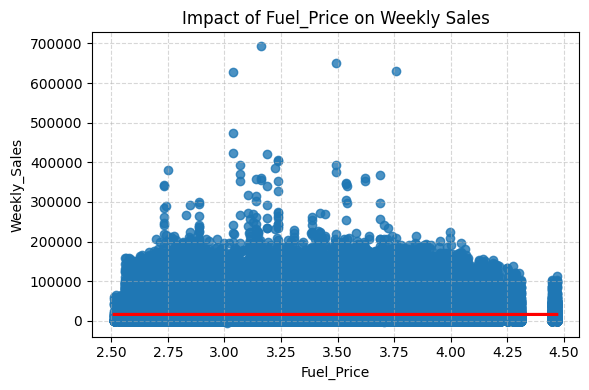

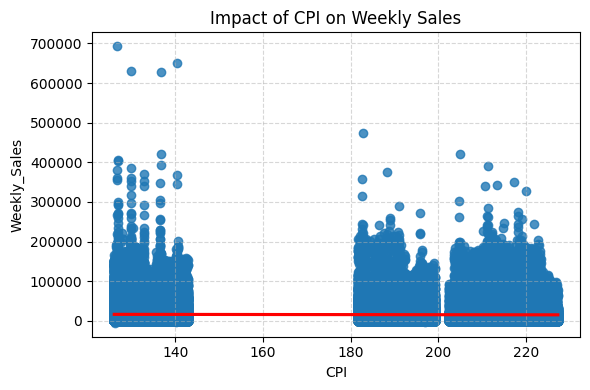

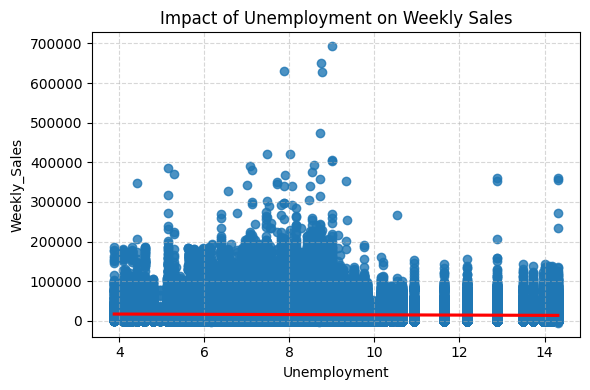

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in ['Fuel_Price', 'CPI', 'Unemployment']:
    plt.figure(figsize=(6, 4))
    sns.regplot(data=model_df, x=col, y='Weekly_Sales', line_kws={"color": "red"})
    plt.title(f"Impact of {col} on Weekly Sales")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()


Feature Importance

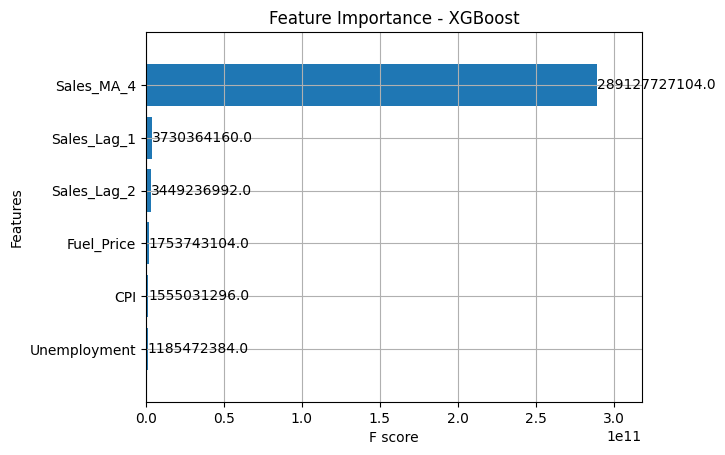

Feature Importance Scores (Gain):
Sales_MA_4: 289127727104.0000
Sales_Lag_1: 3730364160.0000
Sales_Lag_2: 3449236992.0000
Fuel_Price: 1753743104.0000
CPI: 1555031296.0000
Unemployment: 1185472384.0000


In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Plot feature importance
xgb.plot_importance(xgb_model, max_num_features=10, importance_type='gain', height=0.8)
plt.title("Feature Importance - XGBoost")
plt.show()

# Get feature importance scores as a DataFrame
importance = xgb_model.get_booster().get_score(importance_type='gain')

# Convert to DataFrame for better formatting
importance_df = pd.DataFrame(importance.items(), columns=['Feature', 'Importance']).sort_values(by='Importance', ascending=False)

print("Feature Importance Scores (Gain):")
for idx, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")


#Impact on External Factors Explanation

Sales_MA_4 (Moving Average of sales over 4 weeks) is by far the most important feature by a huge margin. This suggests recent sales trends have the strongest influence on your model’s predictions.

Sales_Lag_1 and Sales_Lag_2 (sales from 1 and 2 weeks ago) also contribute significantly, which makes sense as past sales are usually predictive of future sales.

Among external factors, Fuel_Price has the highest importance, followed by CPI and Unemployment, but their importance scores are much smaller compared to the sales features.

#Markdown Impact Analysis

Goal:
Understand how markdowns (discounts/promotions) affect weekly sales across stores and departments.

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Year', 'Month',
       'Week', 'DayOfWeek'],
      dtype='object')


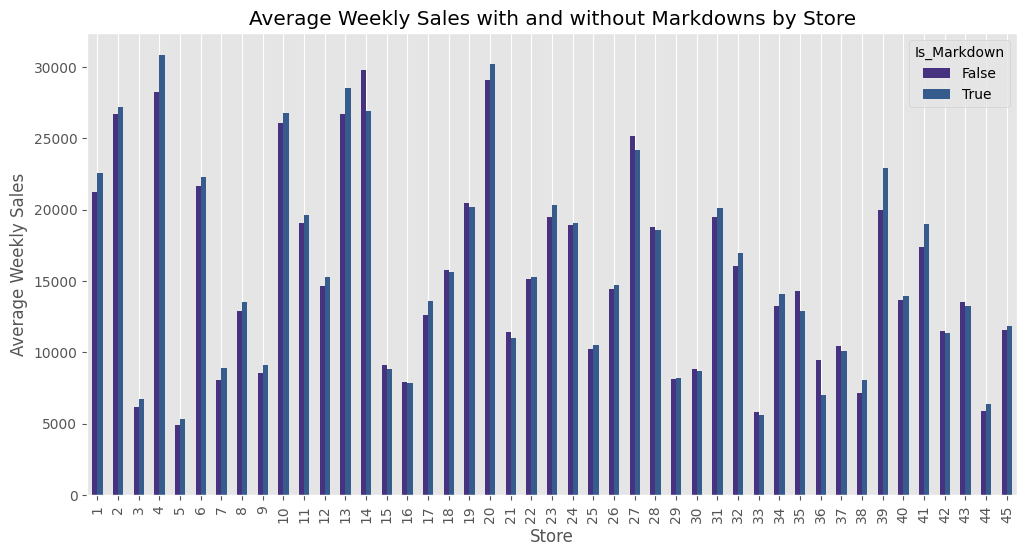

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# The relevant columns are MarkDown1 to MarkDown5
print(master_df.columns)

markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']

# Ensure these columns exist before summing
existing_markdown_cols = [col for col in markdown_cols if col in master_df.columns]

if existing_markdown_cols:
    master_df['Total_Markdown'] = master_df[existing_markdown_cols].sum(axis=1)
    master_df['Is_Markdown'] = master_df['Total_Markdown'] > 0

    # Aggregate average sales by store and markdown status
    # Handle potential NaN values that can occur if some stores/markdown statuses are missing
    markdown_impact = master_df.groupby(['Store', 'Is_Markdown'])['Weekly_Sales'].mean().unstack()

    # Visualize markdown impact on average sales by store
    plt.figure(figsize=(12, 6))
    # Ensure there are values to plot
    if not markdown_impact.empty:
        markdown_impact.plot(kind='bar', figsize=(12, 6), ax=plt.gca())
        plt.title('Average Weekly Sales with and without Markdowns by Store')
        plt.ylabel('Average Weekly Sales')
        plt.xlabel('Store')
        plt.grid(axis='y')
        plt.show()
    else:
        print("No data to plot after grouping by Store and Is_Markdown.")

else:
    print("Markdown columns (MarkDown1 to MarkDown5) not found in the DataFrame.")

#Personalization Strategies

Segmentation Implementation

Is_Markdown  Markdown_Lift
Store Dept                
45    96               inf
      77               inf
9     77               inf
10    77               inf
11    77               inf
7     99               inf
12    77               inf
      96               inf
      99               inf
13    43               inf


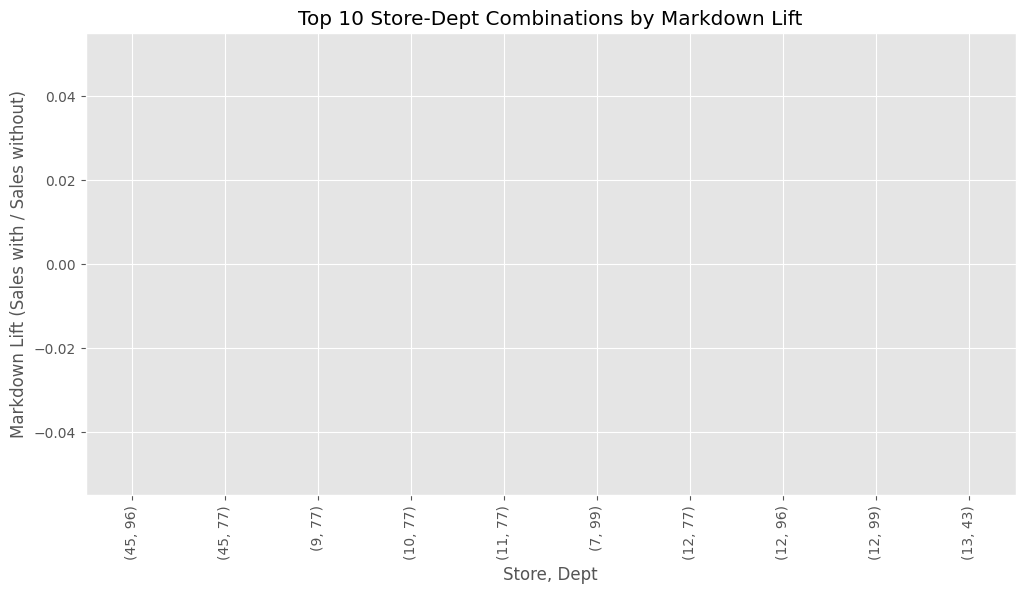

In [9]:
# Aggregate markdown sales by Store and Dept
dept_markdown_sales = master_df.groupby(['Store', 'Dept', 'Is_Markdown'])['Weekly_Sales'].mean().unstack().fillna(0)

# Calculate markdown lift (sales with markdown / sales without markdown)
dept_markdown_sales['Markdown_Lift'] = dept_markdown_sales[True] / dept_markdown_sales[False]

# Sort to find stores and departments with highest markdown lift
top_markdown_lift = dept_markdown_sales.sort_values('Markdown_Lift', ascending=False).head(10)
print(top_markdown_lift[['Markdown_Lift']])

# Plot top stores/departments by markdown lift
top_markdown_lift['Markdown_Lift'].plot(kind='bar', figsize=(12,6))
plt.title('Top 10 Store-Dept Combinations by Markdown Lift')
plt.ylabel('Markdown Lift (Sales with / Sales without)')
plt.xlabel('Store, Dept')
plt.show()


Markdown Calculation

In [10]:
# Calculate average sales with/without markdowns by Store and Dept
store_dept_markdown = master_df.groupby(['Store', 'Dept', 'Is_Markdown'])['Weekly_Sales'].mean().unstack().fillna(0)

# Calculate Markdown Lift (sales with markdown / sales without markdown)
store_dept_markdown['Markdown_Lift'] = store_dept_markdown[True] / store_dept_markdown[False]

# Preview
print(store_dept_markdown.head())


Is_Markdown         False          True  Markdown_Lift
Store Dept                                            
1     1      22442.782717  22640.571961       1.008813
      2      45665.043478  46890.488824       1.026836
      3      12909.934022  13584.400588       1.052244
      4      36253.647826  38245.852745       1.054952
      5      23423.022283  25764.069216       1.099946


Segmentation of Stores and Departments by Makrdown Response

In [11]:
# Define markdown lift bins
bins = [0, 1, 1.2, store_dept_markdown['Markdown_Lift'].max()]
labels = ['Low', 'Medium', 'High']

store_dept_markdown['Markdown_Response_Segment'] = pd.cut(store_dept_markdown['Markdown_Lift'], bins=bins, labels=labels, include_lowest=True)

# Count by segment
print(store_dept_markdown['Markdown_Response_Segment'].value_counts())


Markdown_Response_Segment
Low       1464
Medium    1338
High       469
Name: count, dtype: int64


Vizualization of Segments

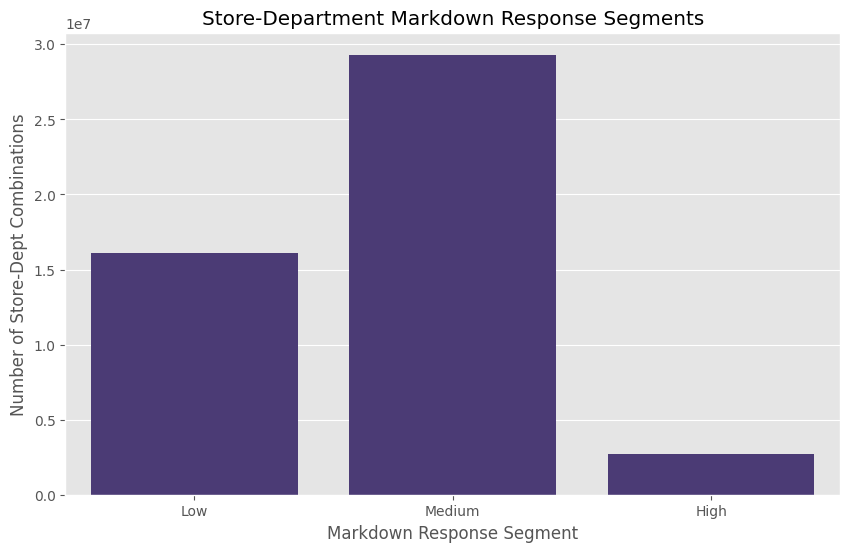

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.countplot(data=store_dept_markdown, x='Markdown_Response_Segment', order=labels)
plt.title('Store-Department Markdown Response Segments')
plt.xlabel('Markdown Response Segment')
plt.ylabel('Number of Store-Dept Combinations')
plt.show()


Visualization of Sales Pattern Within Each Segment

<ipython-input-13-a525ec222c22>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_sales_segment = store_dept_markdown.groupby('Markdown_Response_Segment')[[True, False]].mean()


Is_Markdown                        True         False
Markdown_Response_Segment                            
Low                        10989.919787  11800.422795
Medium                     21905.570002  20472.452996
High                        5784.722673   4317.147240


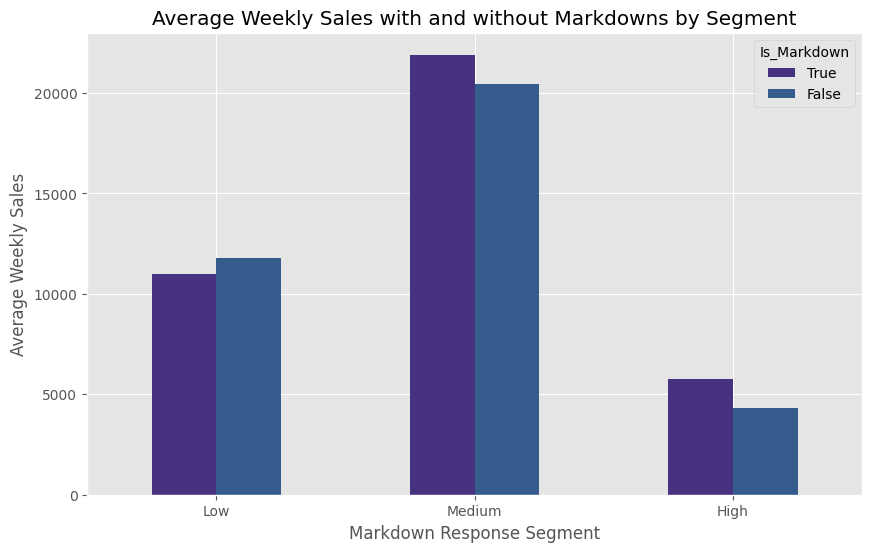

In [13]:
# Average sales by segment
avg_sales_segment = store_dept_markdown.groupby('Markdown_Response_Segment')[[True, False]].mean()
print(avg_sales_segment)

# Plot average sales with and without markdowns for each segment
avg_sales_segment.plot(kind='bar', figsize=(10,6))
plt.title('Average Weekly Sales with and without Markdowns by Segment')
plt.ylabel('Average Weekly Sales')
plt.xlabel('Markdown Response Segment')
plt.xticks(rotation=0)
plt.show()


#MarkDown Impact Analysis Explanation

Low segment: Stores/departments with markdowns sell about 10,990 on average, slightly less than sales without markdowns (11,800). So markdowns here may not boost sales — possibly even reduce them.

Medium segment: Stores/departments where markdowns improve sales from 20,472 (no markdown) to 21,906 (with markdown). Here markdowns have a positive impact.

High segment: Stores/departments with markdowns sell 5,785 vs 4,317 without markdowns — markdowns strongly boost sales here, but overall sales are lower compared to other segments.

Insights:
Markdown impact varies a lot by segment.

Medium and High response segments benefit from markdown-driven promotions.

Low response segment might need alternative strategies (e.g., different promotions, inventory, or pricing).

#Real-World Application and Strategy Formulation

1) Comprehensive Strategy for Inventory Management, Marketing, and Store Optimization

Inventory Management:

Use demand forecasting models (XGBoost or LSTM) to predict weekly sales accurately at store and department levels.

Incorporate external factors such as fuel price, CPI, and unemployment to adjust forecasts during economic shifts.

Tailor inventory levels based on forecasted demand to reduce overstock and stockouts.

Segment stores by size and type to customize inventory replenishment frequency and quantity.

Monitor markdown responses to optimize clearance strategies and minimize unsold inventory.

Marketing Strategy:

Deploy personalized promotions leveraging markdown response segments (Low, Medium, High responsiveness).

Align marketing campaigns with forecasted high-demand periods and regional economic conditions.

Use holiday and seasonal trends (e.g., IsHoliday flags) to time targeted marketing efforts.

Leverage store and department segmentation to optimize marketing budget allocation.

Track marketing impact continuously to refine campaigns based on sales uplift.

Store Optimization:

Allocate staffing and resources dynamically based on predicted footfall and sales.

Optimize store layout and product placement by analyzing top-performing departments.

Use anomaly detection (Is_Anomaly) to investigate unexpected sales drops or spikes for operational adjustments.

Implement climate or regional adjustments (temperature, local events) if relevant.

2) Potential Real-World Challenges in Implementing These Strategies
Data Quality and Availability: Inconsistent or missing data can reduce forecasting accuracy and operational effectiveness.

Integration Complexity: Aligning forecasting outputs with inventory management, marketing systems, and store operations requires seamless integration.

Change Management: Staff and management need training and buy-in to adopt data-driven decisions.

External Shocks: Sudden economic changes, supply chain disruptions, or unforeseen events (pandemics, weather disasters) can impact demand unpredictably.

Scalability: Strategies must be scalable across multiple stores and departments with varying customer behavior.

Privacy and Compliance: Personalized marketing needs to adhere to customer privacy regulations.



#Conclusion

This project provides a comprehensive analysis of retail sales data through data preprocessing, exploratory analysis, modeling, and strategic recommendations. Key components addressed include:

Anomaly Detection: Identified unusual sales patterns and applied cleaning techniques to ensure data quality.

Time-Series Insights: Analyzed seasonal trends and holiday effects to understand sales fluctuations over time.

Feature Engineering: Handled missing values and engineered relevant features like store type and regional attributes to enhance model accuracy.

Customer Segmentation: Clustered stores/departments based on sales behavior, markdowns, and regional traits to uncover meaningful groups.

Market Basket Analysis: Inferred possible item associations within departments to inform cross-selling strategies.

Demand Forecasting: Built predictive models incorporating external factors like CPI, unemployment, and fuel prices to forecast weekly sales.

External Impact Assessment: Integrated economic indicators to improve forecasting and strategic planning.

Personalization Strategies: Suggested targeted marketing and inventory management plans based on segment characteristics.

Segmentation Evaluation: Evaluated clustering quality using metrics to ensure meaningful and distinct segments.

Strategic Formulation: Proposed real-world applications for inventory optimization, marketing, and store performance enhancement.